In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [2]:
#Readind data from csv
df_original = pd.read_json('as24_cars.json', orient='records')
df1 = pd.read_csv('filled_missing_values.csv')
df = df1.copy() 
df.head()


,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,seller,...,upholstery,previous_owner,avg_fuel_consumption,horsepower,categorized_fuel_type,age,comfort_convenience_counts,entertainment_media_counts,extras_counts,safety_security_counts
0,Renault Clio,Renault,16990.0,Sedan,Used,5.0,24.0,20926.0,Manual,Dealer,...,Cloth,1.0,3.6,90.0,LPG,-180.0,12.0,5.0,1.0,15.0
1,Fiat 500 Abarth,Fiat,17995.0,Compact,Used,3.0,6.0,59629.0,Manual,Dealer,...,Cloth,1.0,5.8,145.0,Benzine,-3.0,5.0,2.0,3.0,15.0
2,Nissan Micra,Nissan,3250.0,Convertible,Used,2.0,36.0,147985.0,Manual,Dealer,...,Part leather,1.0,6.6,110.0,Benzine,-1.0,6.0,3.0,1.0,9.0
3,Ford Ranger Raptor,Ford,62970.0,Off-Road/Pick-up,Used,4.0,12.0,5000.0,Automatic,Dealer,...,Part leather,1.0,8.4,212.0,Diesel,0.0,18.0,4.0,5.0,19.0
4,Renault Captur,Renault,24595.0,Off-Road/Pick-up,Pre-registered,5.0,24.0,1.0,Manual,Dealer,...,Cloth,1.0,5.7,140.0,Benzine,0.0,18.0,5.0,6.0,22.0


In [3]:
df.columns

Index(['make_model', 'make', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'gearbox', 'seller', 'seats', 'engine_size', 'gears',
       'co2_emissions', 'drivetrain', 'cylinders', 'empty_weight',
       'full_service_history', 'non_smoker_vehicle', 'upholstery',
       'previous_owner', 'avg_fuel_consumption', 'horsepower',
       'categorized_fuel_type', 'age', 'comfort_convenience_counts',
       'entertainment_media_counts', 'extras_counts',
       'safety_security_counts'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24462 entries, 0 to 24461
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   make_model                  24462 non-null  object 
 1   make                        24462 non-null  object 
 2   price                       24462 non-null  float64
 3   body_type                   24462 non-null  object 
 4   type                        24462 non-null  object 
 5   doors                       24462 non-null  float64
 6   warranty                    24462 non-null  float64
 7   mileage                     24462 non-null  float64
 8   gearbox                     24462 non-null  object 
 9   seller                      24462 non-null  object 
 10  seats                       24462 non-null  float64
 11  engine_size                 24462 non-null  float64
 12  gears                       24462 non-null  float64
 13  co2_emissions               244

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,24462.0,23910.552694,26608.870094,490.0,11900.0,18690.0,28498.0,1346900.0
doors,24462.0,4.115117,1.213685,1.0,3.0,5.0,5.0,6.0
warranty,24462.0,17.897228,15.294099,0.0,12.0,12.0,12.0,142.0
mileage,24462.0,71205.682242,67843.971289,0.0,19500.0,54985.0,104814.5,1440000.0
seats,24462.0,4.693157,0.816384,0.0,4.0,5.0,5.0,17.0
engine_size,24462.0,1748.171818,1106.517099,0.0,1248.0,1597.0,1987.0,99900.0
gears,24462.0,5.867999,1.516878,0.0,5.0,6.0,6.0,10.0
co2_emissions,24462.0,127.528166,132.778565,0.0,99.0,124.0,156.0,15168.0
cylinders,24462.0,4.045949,1.113125,0.0,4.0,4.0,4.0,26.0
empty_weight,24462.0,1418.738860,326.566288,75.0,1205.0,1375.0,1584.0,15590.0


In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column + ' unique values: ',df[column].nunique())
    else:
        pass



make_model unique values:  611
make unique values:  13
body_type unique values:  6
type unique values:  4
gearbox unique values:  3
seller unique values:  2
drivetrain unique values:  3
full_service_history unique values:  2
non_smoker_vehicle unique values:  2
upholstery unique values:  6
categorized_fuel_type unique values:  5


In [7]:
def find_outliers(df, methods=['iqr', 'z_score'], z_score_threshold=3):
    """
    Detect outliers in a pandas DataFrame using IQR and/or Z-Score methods.

    Parameters:
    - df (pandas DataFrame): Input DataFrame.
    - methods (list, optional): List of methods to use. Defaults to ['iqr', 'z_score'].
    - z_score_threshold (int, optional): Z-Score threshold for outlier detection. Defaults to 3.

    Returns:
    - outlier_results (dict): Dictionary with outlier counts per column for each method.
    """
    outlier_results = {method: {} for method in methods}
    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        series = df[column]
        
        # IQR Method
        if 'iqr' in methods:
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            iqr_outliers = series[(series < lower_bound) | (series > upper_bound)]
            outlier_results['iqr'][column] = len(iqr_outliers)
        
        # Z-Score Method
        if 'z_score' in methods:
            z_scores = np.abs(stats.zscore(series))
            z_score_outliers = series[z_scores > z_score_threshold]
            outlier_results['z_score'][column] = len(z_score_outliers)

    return outlier_results


outlier_results = find_outliers(df)

# Print the results
for method, results in outlier_results.items():
    print(f"Outlier counts using {method.upper()} method:")
    for column, count in results.items():
        print(f"- {column}: {count}")
    print()  # Spacer for readability

Outlier counts using IQR method:
- price: 1592
- doors: 0
- warranty: 8056
- mileage: 607
- seats: 1636
- engine_size: 1808
- gears: 4136
- co2_emissions: 3802
- cylinders: 7384
- empty_weight: 652
- previous_owner: 795
- avg_fuel_consumption: 1363
- horsepower: 2350
- age: 1711
- comfort_convenience_counts: 0
- entertainment_media_counts: 4
- extras_counts: 347
- safety_security_counts: 1

Outlier counts using Z_SCORE method:
- price: 312
- doors: 0
- warranty: 170
- mileage: 238
- seats: 1228
- engine_size: 141
- gears: 1082
- co2_emissions: 10
- cylinders: 1136
- empty_weight: 157
- previous_owner: 373
- avg_fuel_consumption: 93
- horsepower: 693
- age: 517
- comfort_convenience_counts: 0
- entertainment_media_counts: 4
- extras_counts: 181
- safety_security_counts: 1



In [8]:
# Function to visualize outliers
def visualize_outliers(df, column):
        plt.figure(figsize=(15, 5))
        
        # Boxplot
        plt.subplot(131)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        
        # Histogram
        plt.subplot(132)
        df[column].hist(bins=30)
        plt.title(f'Histogram of {column}')
        
        # Violin plot
        plt.subplot(133)
        sns.violinplot(x=df[column])
        plt.title(f'Violin Plot of {column}')
        
        plt.tight_layout()
        plt.show()

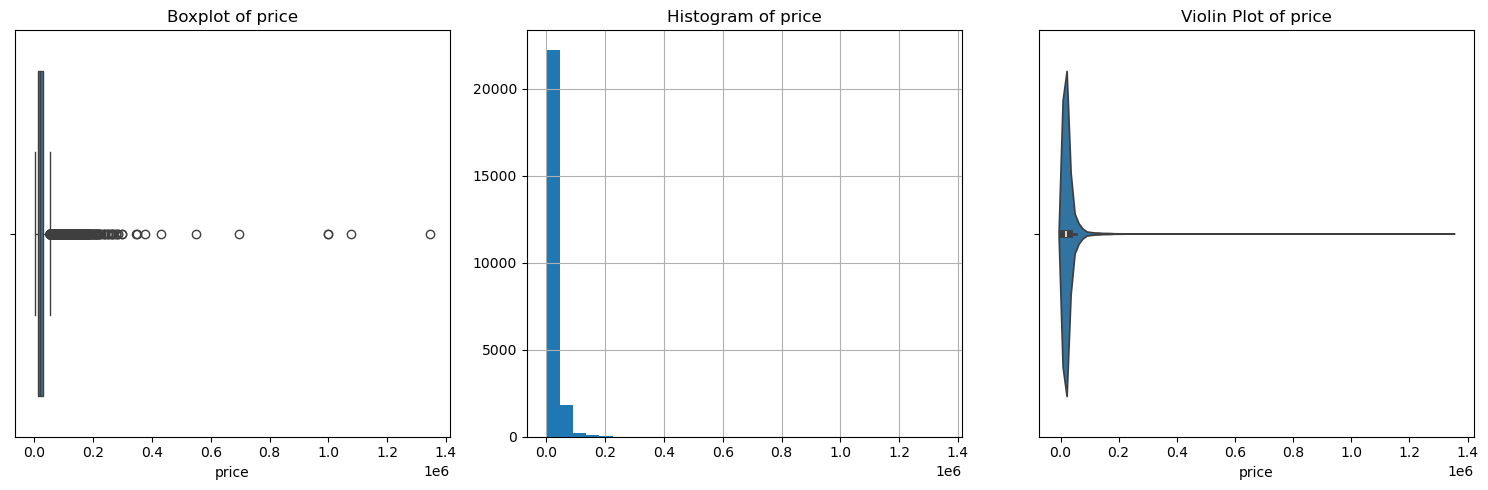

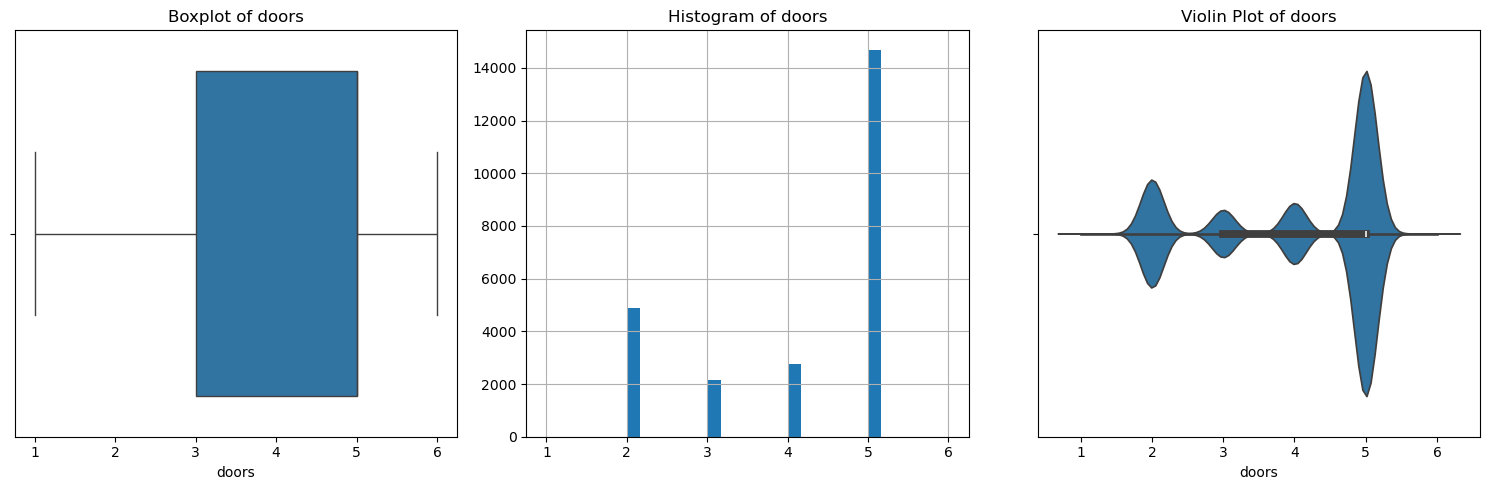

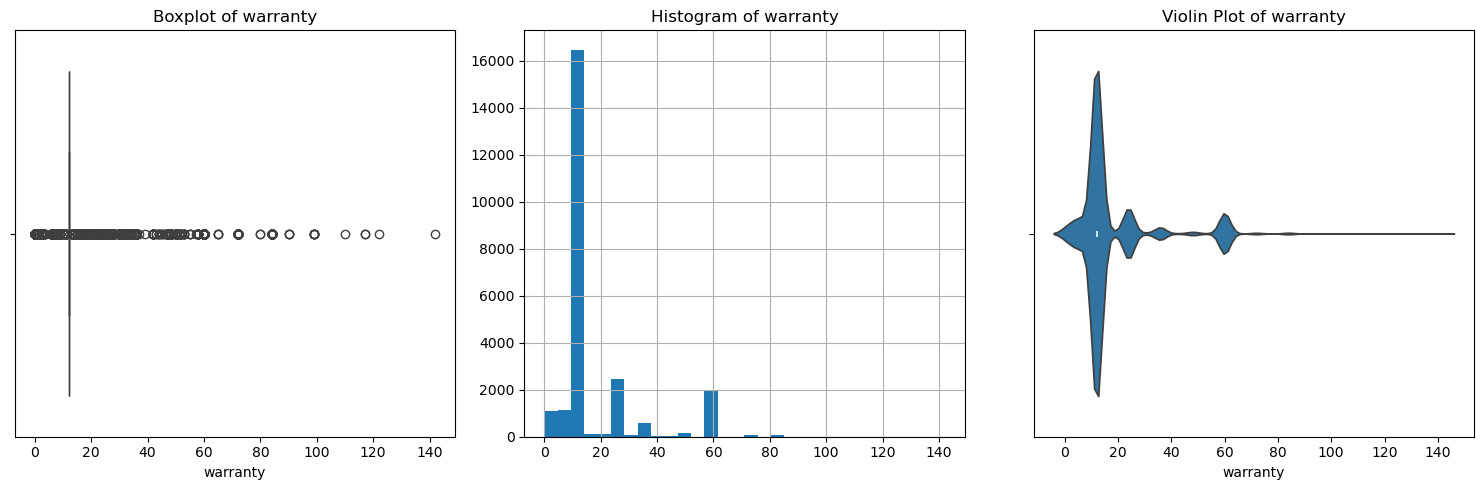

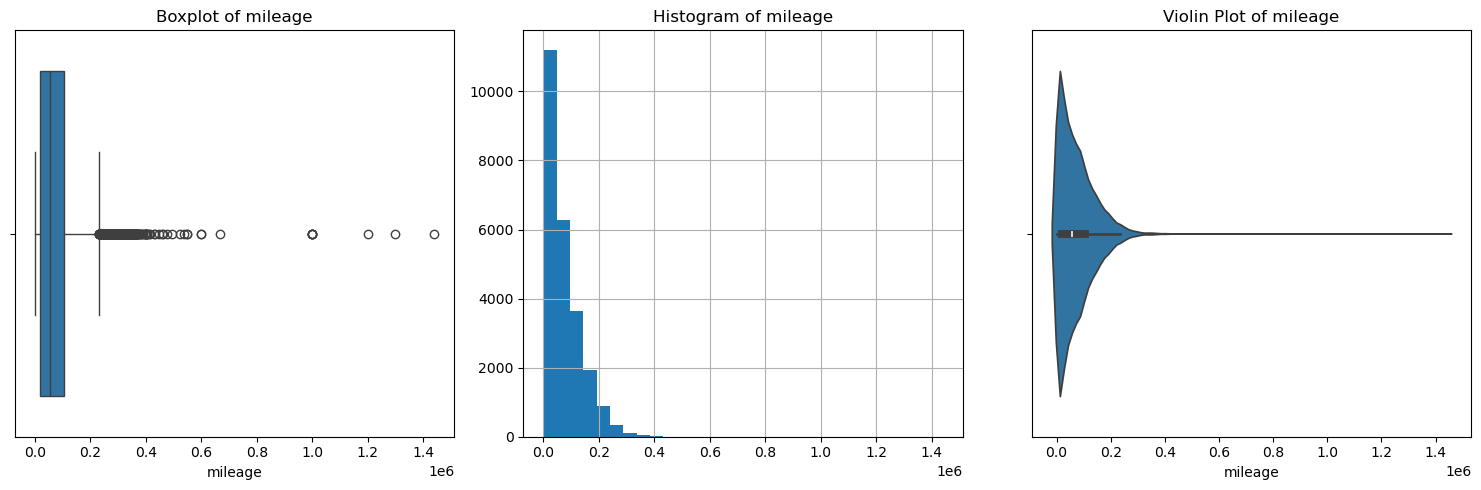

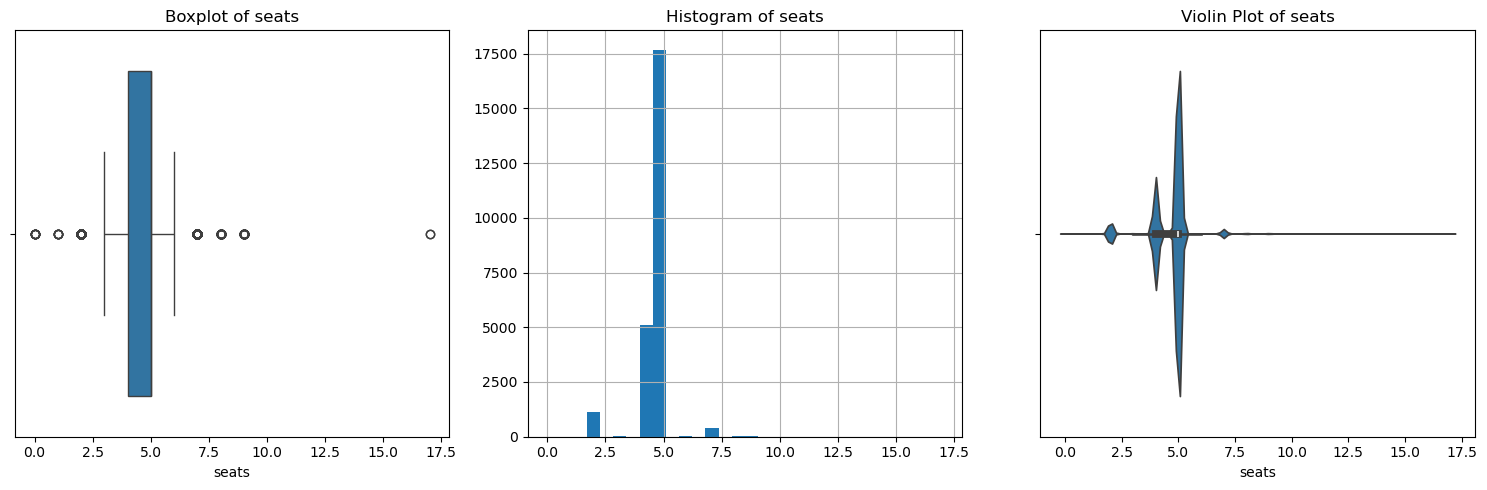

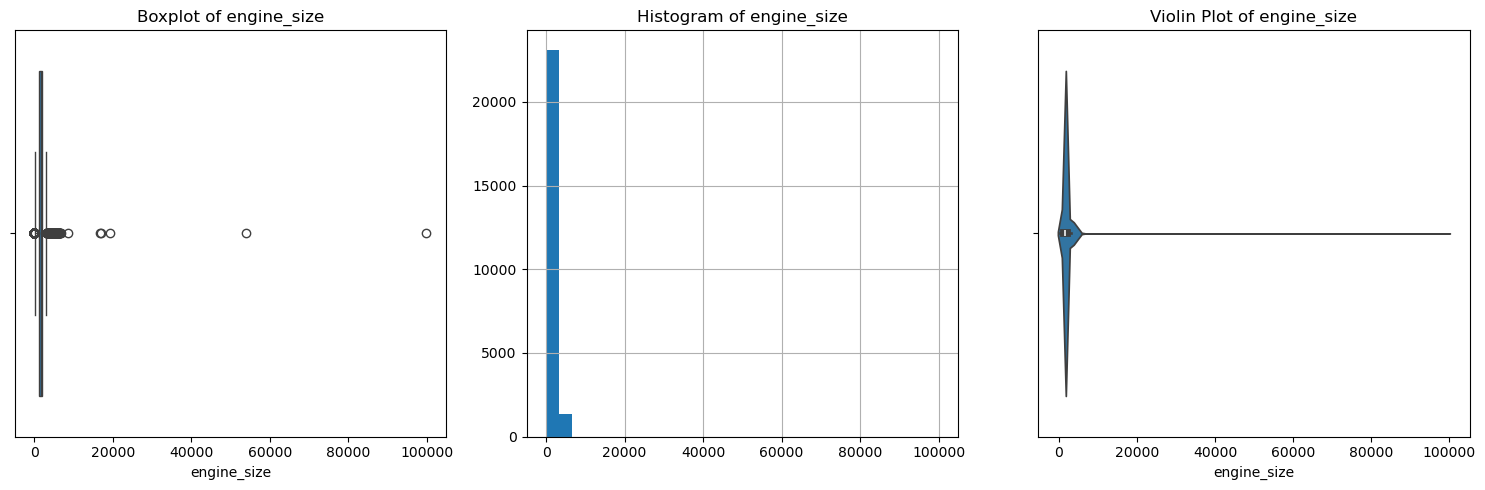

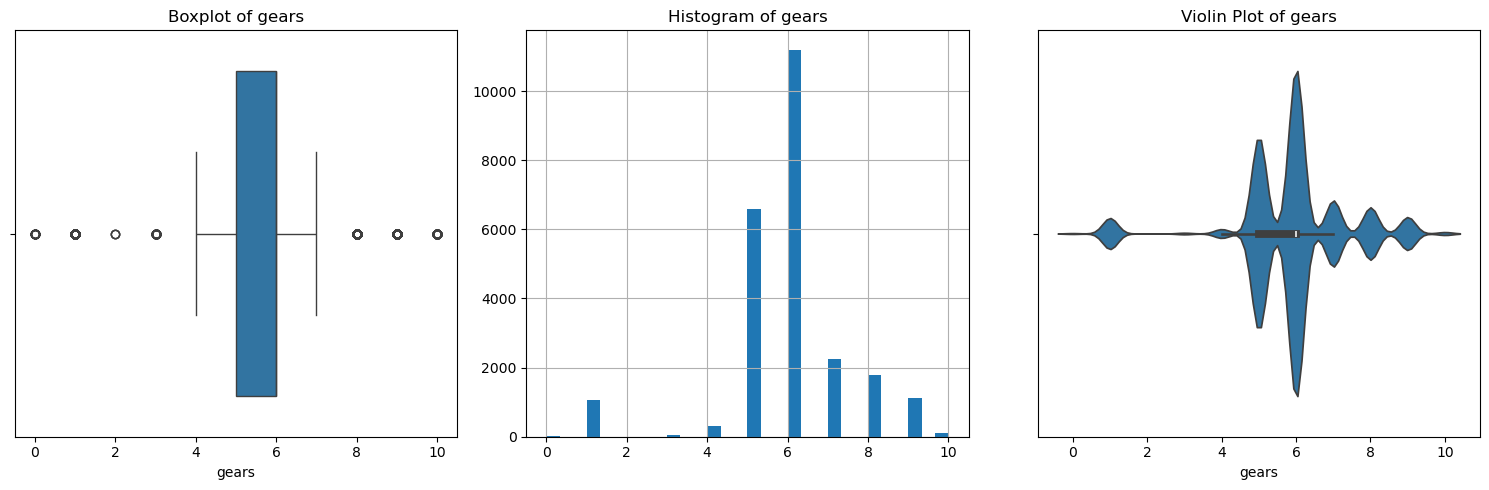

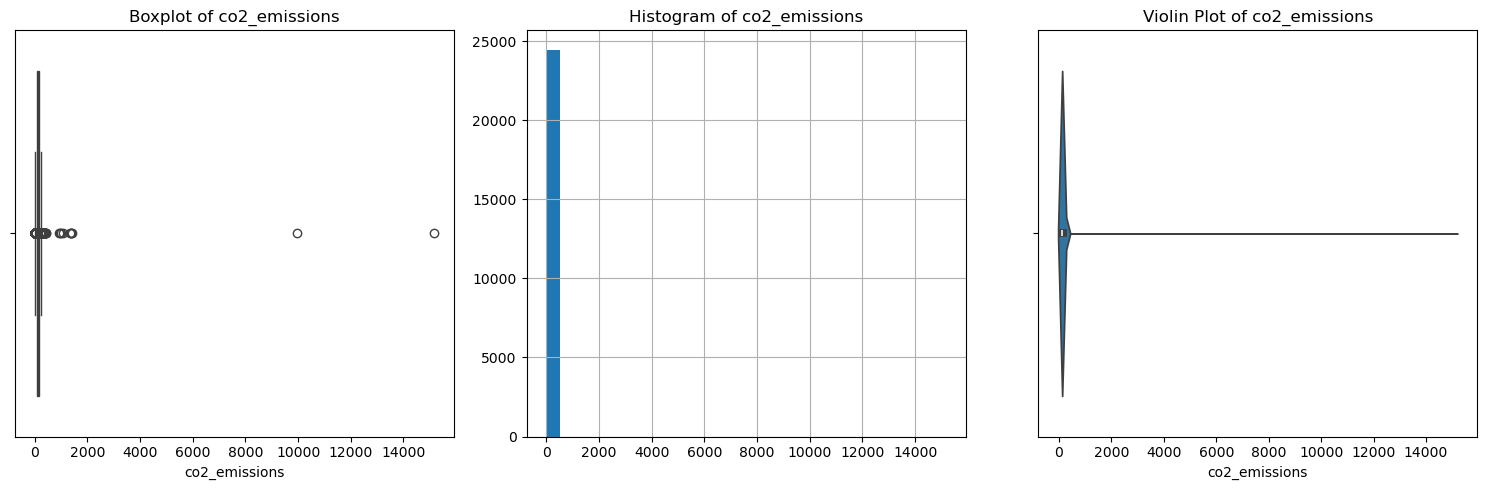

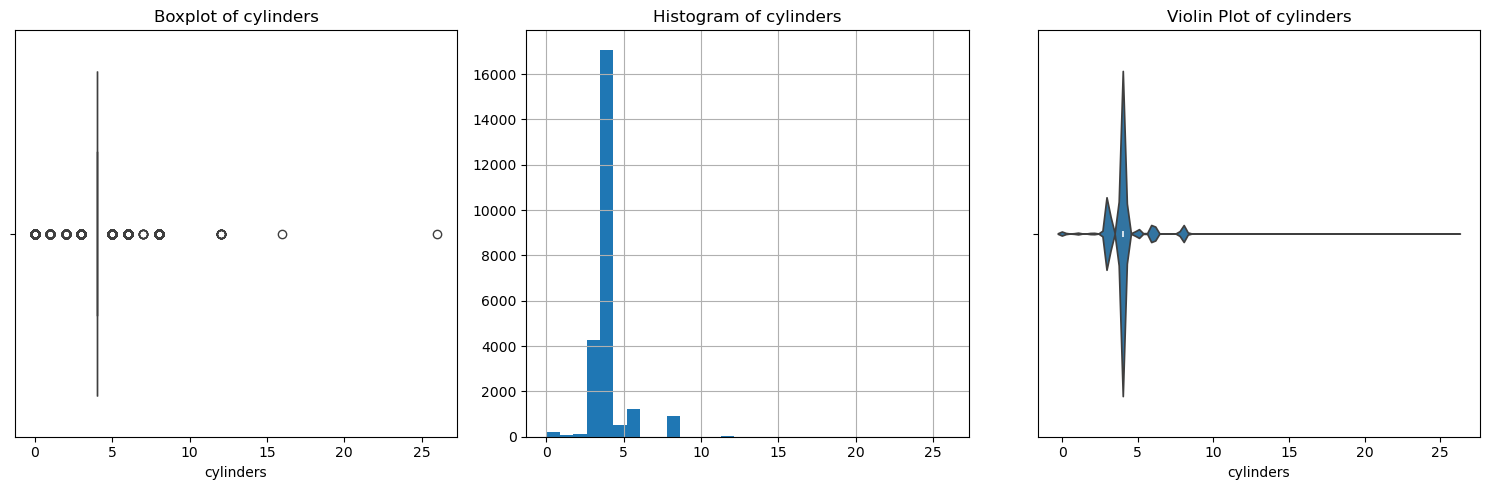

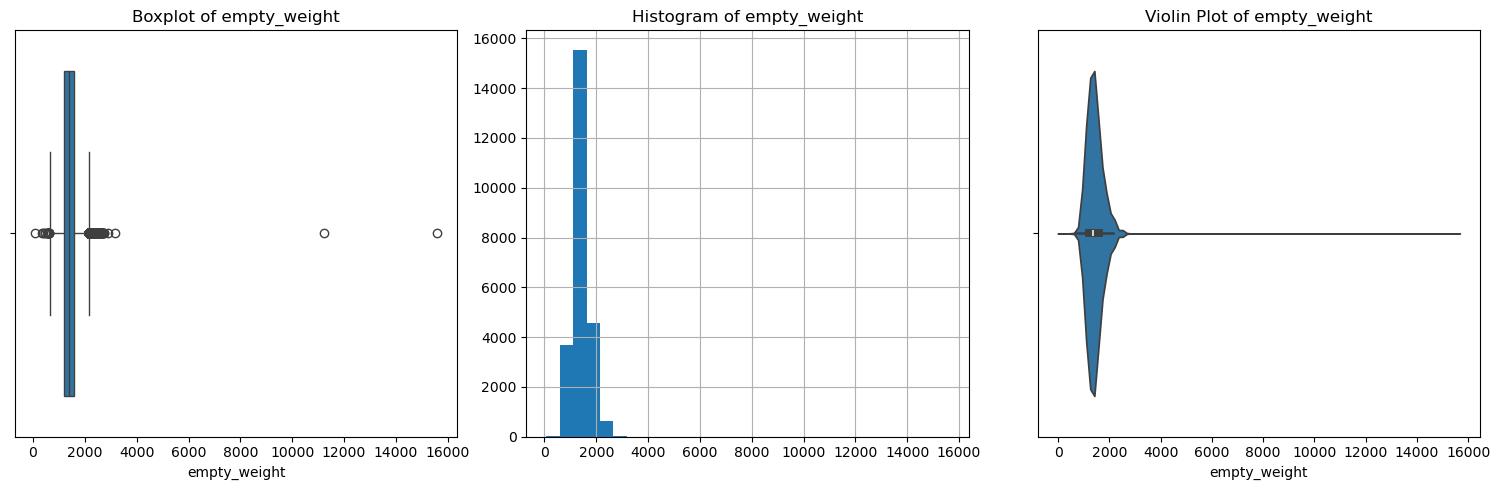

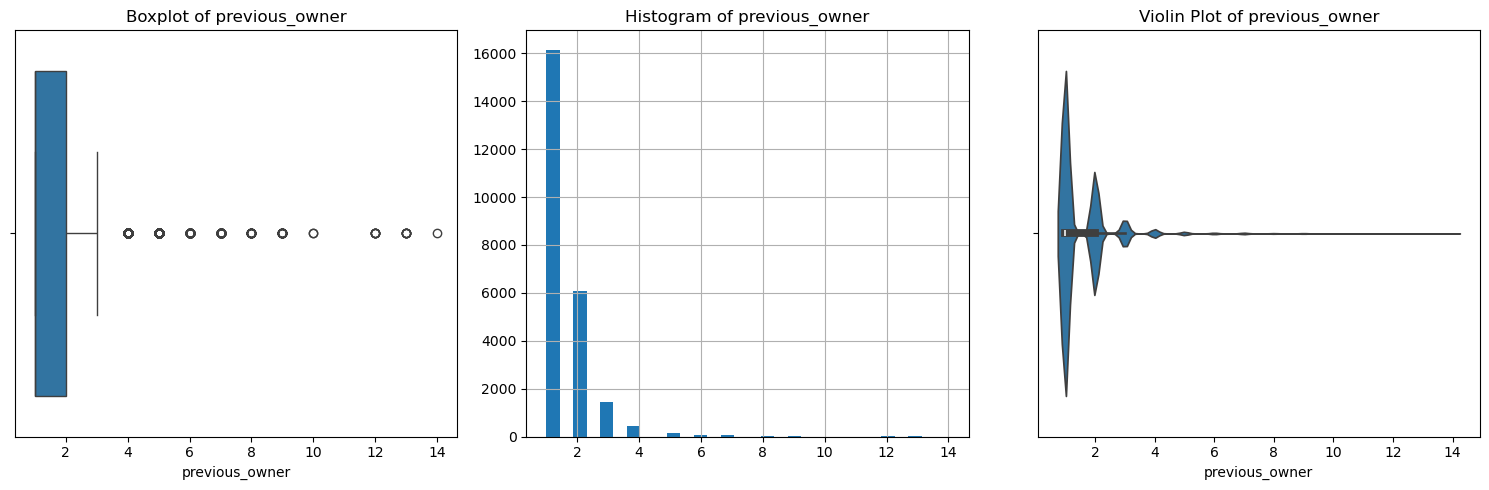

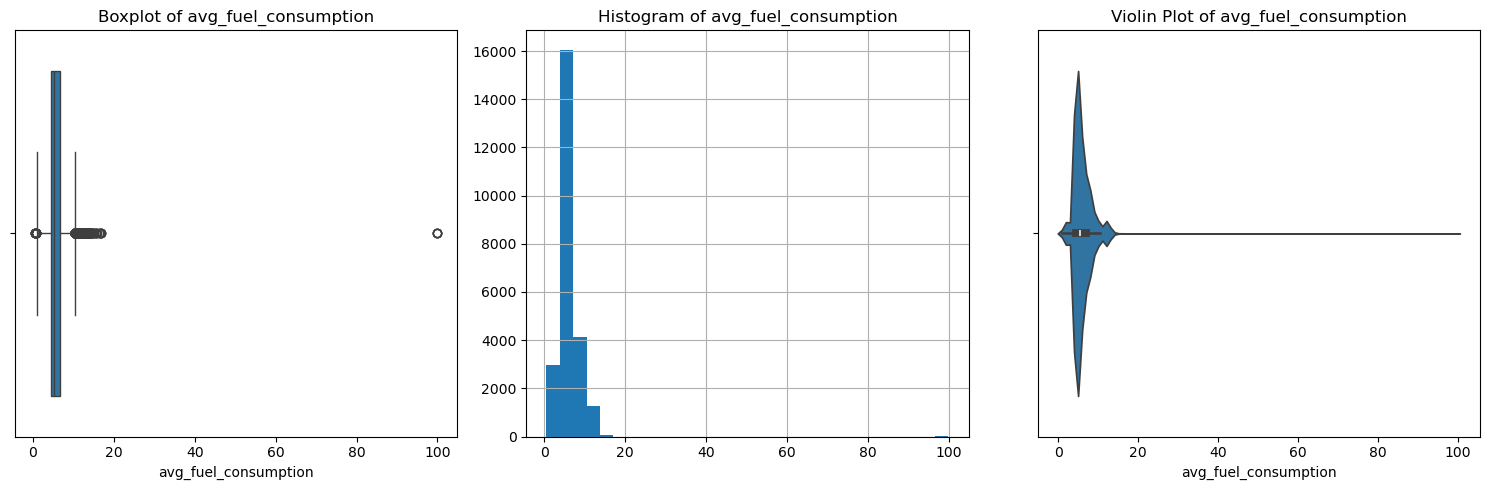

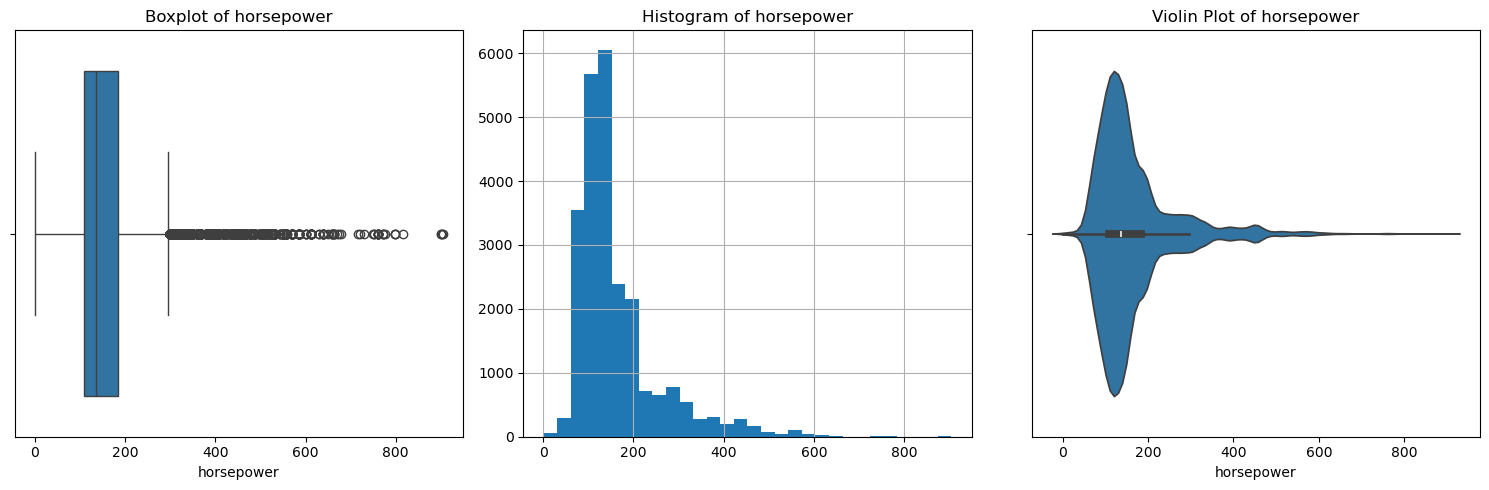

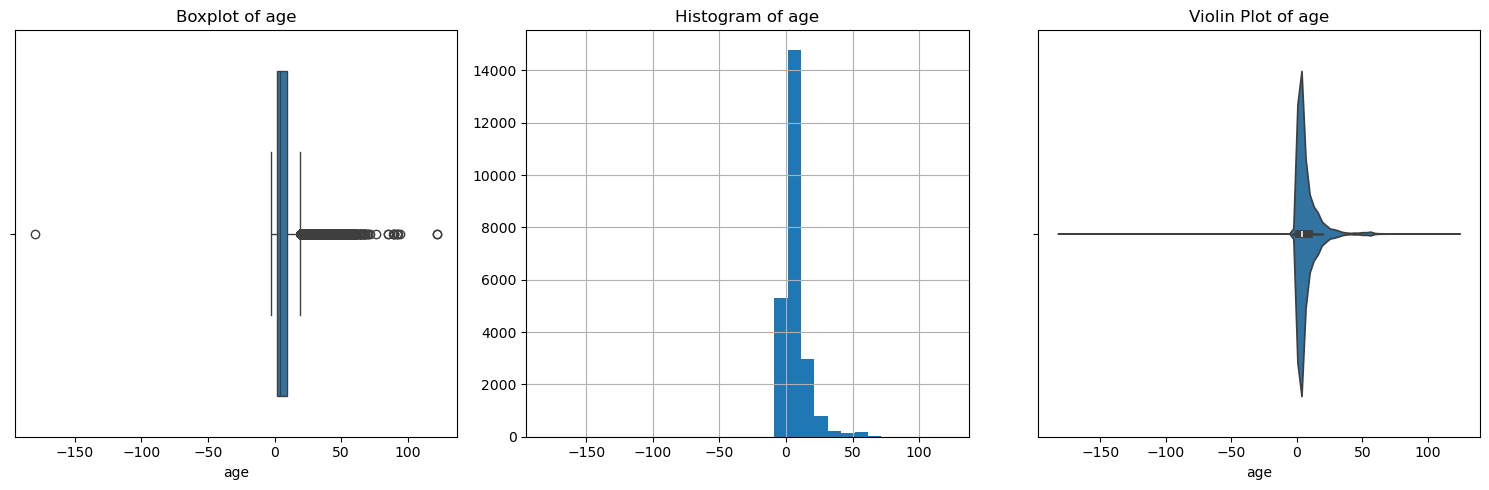

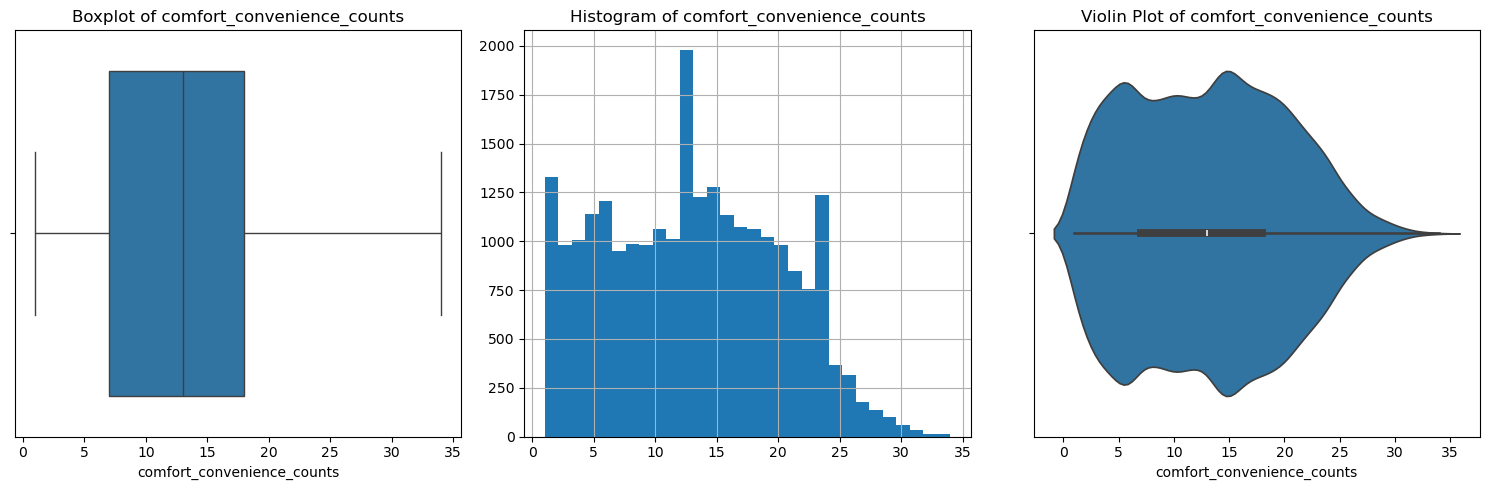

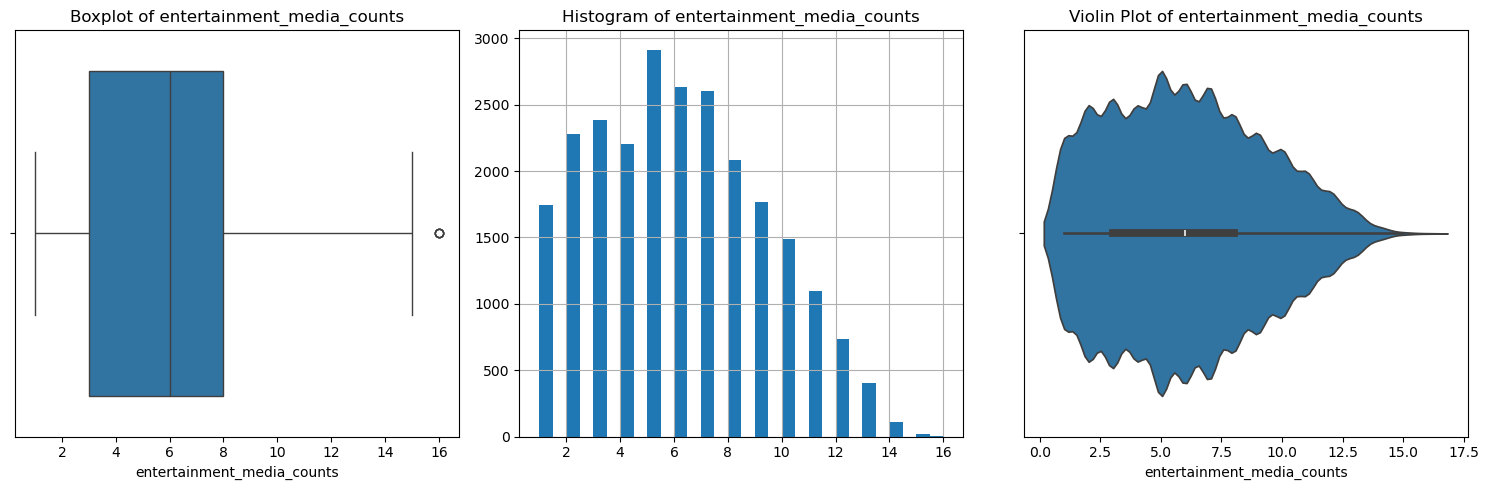

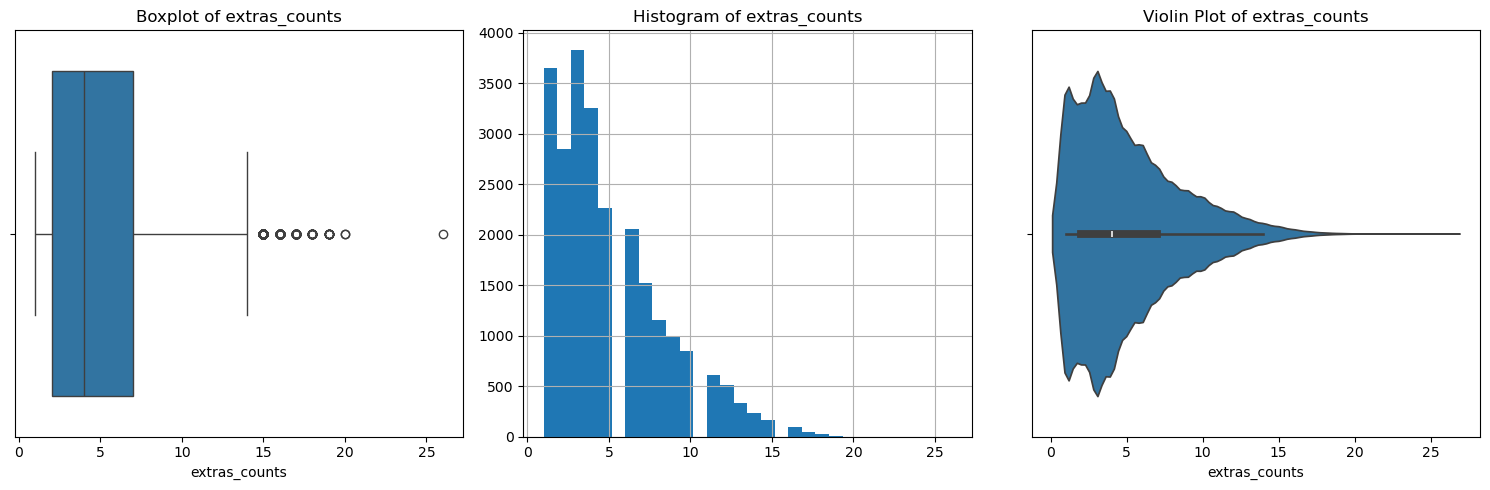

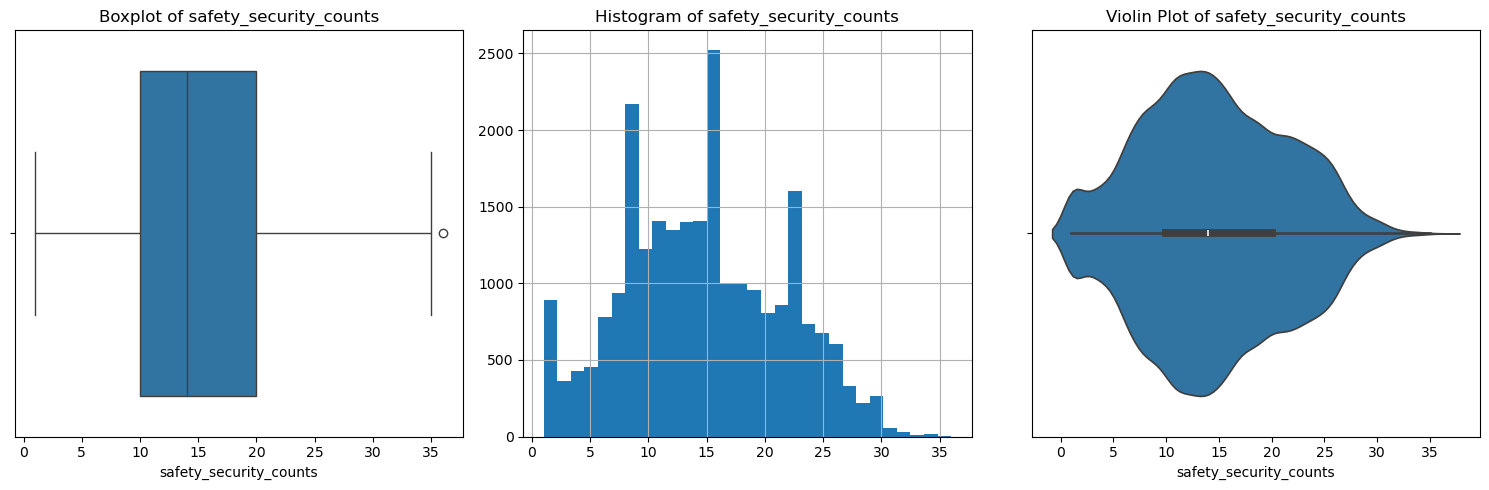

In [9]:
for column in df.describe().columns:
    visualize_outliers(df,column)

In [10]:
df[df['co2_emissions'] == 0.0]['categorized_fuel_type'].value_counts()

categorized_fuel_type
Benzine     1396
Diesel       558
Electric     418
Other         36
LPG            9
Name: count, dtype: int64

In [11]:
# Calculate the mode for each group (excluding zeros)
mode_by_make_model_group = df.groupby('make_model')['co2_emissions'].transform(lambda x: x[x != 0].mode().iat[0] if x[x != 0].mode().size > 0 else 0)
mode_by_make_group = df.groupby('make')['co2_emissions'].transform(lambda x: x[x != 0].mode().iat[0] if x[x != 0].mode().size > 0 else 0)
# Replace 0.0 with the mode for each group
df['co2_emissions'] = np.where(
    (df['co2_emissions'] == 0.0) & (df['categorized_fuel_type'] != 'Electric'),
    mode_by_make_model_group,
    df['co2_emissions']
)
df['co2_emissions'] = np.where((df['co2_emissions'] == 0.0) & (df['categorized_fuel_type'] != 'Electric'),
                                mode_by_make_group,
                                df['co2_emissions'])    
        



In [12]:
df[df['co2_emissions'] >250][['make_model','categorized_fuel_type','co2_emissions']].sample(5)

,make_model,categorized_fuel_type,co2_emissions
24455,Ford,Benzine,277.0
21392,Nissan 350Z,Benzine,288.0
22206,Nissan Murano,Benzine,295.0
11112,Nissan GT-R,Benzine,275.0
19134,Ford Mustang,Benzine,273.0


In [13]:
df[df['co2_emissions']==1][['make_model','categorized_fuel_type','co2_emissions']].index
df.loc[[11432, 15834],'co2_emissions'] = 0.0

In [14]:
# Calculate the mode for each group (excluding zeros)
mode_by_make_model_group = df.groupby('make_model')['co2_emissions'].transform(lambda x: x[x != 0].mode().iat[0] if x[x != 0].mode().size > 0 else 0)
mode_by_make_group = df.groupby('make')['co2_emissions'].transform(lambda x: x[x != 0].mode().iat[0] if x[x != 0].mode().size > 0 else 0)
# Replace 0.0 with the mode for each group
df['co2_emissions'] = np.where(
    (df['co2_emissions'] == 1) & (df['categorized_fuel_type'] != 'Electric'),
    mode_by_make_model_group,
    df['co2_emissions']
)
df['co2_emissions'] = np.where((df['co2_emissions'] == 1) & (df['categorized_fuel_type'] != 'Electric'),
                                mode_by_make_group,
                                df['co2_emissions'])    

<Axes: ylabel='co2_emissions'>

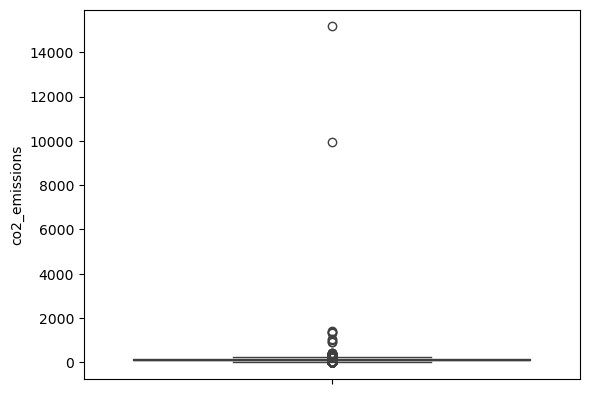

In [15]:
sns.boxplot(df['co2_emissions'],)    

In [16]:
df[df['mileage']>800000][['age','mileage','make_model']]

,age,mileage,make_model
9148,3.0,1440000.0,Nissan Micra
10759,4.0,1199900.0,SEAT Ibiza
12854,4.0,1000001.0,Ford Fiesta
24017,36.0,1300000.0,Toyota Celica
24284,54.0,999999.0,Opel Kadett
24286,54.0,1000000.0,Peugeot 404
24358,56.0,999999.0,Ford Mustang
24452,89.0,999999.0,Fiat


In [17]:
df[['make_model','engine_size']].sort_values(by='engine_size',ascending=False)

,make_model,engine_size
10062,Dacia Sandero,99900.0
21098,Ford Mustang,54009.0
23046,Mercedes-Benz SL 320,19194.0
17348,Renault Megane,16998.0
593,Dacia Dokker,16597.0
...,...,...
3680,Volvo C40,0.0
12165,Nissan Leaf,0.0
7234,Nissan Leaf,0.0
1262,Ford Mustang Mach-E,0.0


In [18]:
# Check negative age rows
negative_age_rows = df[df['age'] < 0]
index_of_negatives = negative_age_rows.index
index_of_negatives

Index([0, 1, 2], dtype='int64')

In [19]:
df.loc[index_of_negatives]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,seller,...,upholstery,previous_owner,avg_fuel_consumption,horsepower,categorized_fuel_type,age,comfort_convenience_counts,entertainment_media_counts,extras_counts,safety_security_counts
0,Renault Clio,Renault,16990.0,Sedan,Used,5.0,24.0,20926.0,Manual,Dealer,...,Cloth,1.0,3.6,90.0,LPG,-180.0,12.0,5.0,1.0,15.0
1,Fiat 500 Abarth,Fiat,17995.0,Compact,Used,3.0,6.0,59629.0,Manual,Dealer,...,Cloth,1.0,5.8,145.0,Benzine,-3.0,5.0,2.0,3.0,15.0
2,Nissan Micra,Nissan,3250.0,Convertible,Used,2.0,36.0,147985.0,Manual,Dealer,...,Part leather,1.0,6.6,110.0,Benzine,-1.0,6.0,3.0,1.0,9.0


In [20]:
# Create a function to replace negative ages based on other features
def impute_age(row):
    if row['age'] <0:
        # Example: Use median engine size for that specific category
        return df[(df['make_model'] == row['make_model']) & 
                  (df['age'] > 0)]['age'].median()
    return row['age']

# Apply the imputation
df['age'] = df.apply(impute_age, axis=1)

In [21]:
df.loc[index_of_negatives]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,seller,...,upholstery,previous_owner,avg_fuel_consumption,horsepower,categorized_fuel_type,age,comfort_convenience_counts,entertainment_media_counts,extras_counts,safety_security_counts
0,Renault Clio,Renault,16990.0,Sedan,Used,5.0,24.0,20926.0,Manual,Dealer,...,Cloth,1.0,3.6,90.0,LPG,4.0,12.0,5.0,1.0,15.0
1,Fiat 500 Abarth,Fiat,17995.0,Compact,Used,3.0,6.0,59629.0,Manual,Dealer,...,Cloth,1.0,5.8,145.0,Benzine,4.0,5.0,2.0,3.0,15.0
2,Nissan Micra,Nissan,3250.0,Convertible,Used,2.0,36.0,147985.0,Manual,Dealer,...,Part leather,1.0,6.6,110.0,Benzine,4.0,6.0,3.0,1.0,9.0


In [22]:
engine_size = df[df['engine_size'] > 8000][['make_model','engine_size']]
index_of_engine_size = engine_size.index
engine_size

,make_model,engine_size
593,Dacia Dokker,16597.0
10062,Dacia Sandero,99900.0
17348,Renault Megane,16998.0
21098,Ford Mustang,54009.0
23046,Mercedes-Benz SL 320,19194.0
24259,Ford Mustang,8660.0


In [23]:
# Create a function to replace negative ages based on other features
def impute_engine_size(row):
    if row['engine_size'] > 8000:
        # Example: Use median engine size for that specific category
        return df[(df['make_model'] == row['make_model']) & 
                  (df['engine_size'] < 80000)]['engine_size'].median()
    return row['engine_size']

# Apply the imputation
df['engine_size'] = df.apply(impute_engine_size, axis=1)

In [24]:
def impute_engine(row):
    # Check for zero or NaN values
    if pd.isna(row['engine_size']) or row['engine_size']==0 or row['engine_size']==1:
        # Find median engine size for the specific make_model, excluding zeros
        make_model_median = df[(df['make_model'] == row['make_model']) & 
                                (df['engine_size'] > 1)]['engine_size'].median()
        
        # If no valid median for make_model, use make-specific median
        if pd.isna(make_model_median):
            make_median = df[(df['make'] == row['make']) & 
                              (df['engine_size']>1)]['engine_size'].median()
            
            # If no make-specific median, use overall median
            if pd.isna(make_median):
                make_median = df[df['engine_size']>1 ]['engine_size'].median()
            
            return make_median
        
        return make_model_median
    
    return row['engine_size']

# Apply the imputation
df['engine_size'] = df.apply(impute_engine, axis=1)

<Axes: ylabel='engine_size'>

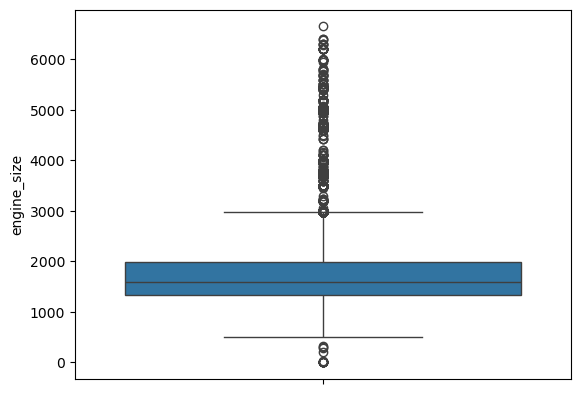

In [25]:
sns.boxplot(df['engine_size'])

In [26]:
def outlier_strategy(df):
    # Detailed outlier analysis
    outlier_summary = {}
    
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and percentage of outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        # Store summary
        outlier_summary[column] = {
            'total_outliers': outlier_count,
            'outlier_percentage': round(outlier_percentage, 2),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_summary

In [27]:
outlier_strategy(df)

{'price': {'total_outliers': 1592,
  'outlier_percentage': 6.51,
  'lower_bound': np.float64(-12997.0),
  'upper_bound': np.float64(53395.0)},
 'doors': {'total_outliers': 0,
  'outlier_percentage': 0.0,
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(8.0)},
 'warranty': {'total_outliers': 8056,
  'outlier_percentage': 32.93,
  'lower_bound': np.float64(12.0),
  'upper_bound': np.float64(12.0)},
 'mileage': {'total_outliers': 607,
  'outlier_percentage': 2.48,
  'lower_bound': np.float64(-108471.75),
  'upper_bound': np.float64(232786.25)},
 'seats': {'total_outliers': 1636,
  'outlier_percentage': 6.69,
  'lower_bound': np.float64(2.5),
  'upper_bound': np.float64(6.5)},
 'engine_size': {'total_outliers': 1861,
  'outlier_percentage': 7.61,
  'lower_bound': np.float64(343.5),
  'upper_bound': np.float64(2979.5)},
 'gears': {'total_outliers': 4136,
  'outlier_percentage': 16.91,
  'lower_bound': np.float64(3.5),
  'upper_bound': np.float64(7.5)},
 'co2_emissions': {'total

In [28]:
def apply_log_transform(df, columns):
    """
    Apply log transformation to specified columns
    Uses log1p to handle zero and negative values
    
    Parameters:
    - df: DataFrame
    - columns: List of column names to transform
    
    Returns:
    - DataFrame with log-transformed columns
    """
    df_log = df.copy()
    
    for col in columns:
        # Check if the column contains negative values
        if (df[col] < 0).any():
            # Shift values to make them positive before log transform
            min_val = df[col].min()
            df_log[f'{col}_log'] = np.log1p(df[col] - min_val)
        else:
            # Standard log transformation
            df_log[f'{col}_log'] = np.log1p(df[col])
    
    return df_log




In [29]:
# Columns to transform
log_columns = [
    'price',           # Car prices often have skewed distribution
    'mileage',         # Mileage can have wide range of values
    'engine_size',     # Engine size varies significantly
    'horsepower',      # Horsepower can have large variations
    'co2_emissions',   # Emissions can be skewed
    'avg_fuel_consumption'  # Fuel consumption can be log-normally distributed
]

df = apply_log_transform(df, log_columns)

In [30]:
df = df.drop(columns=log_columns)

In [31]:
def label_encode_variables(df, columns_to_encode):
    """
    Applies Label Encoding to specified categorical columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing categorical variables to be encoded.
    - columns_to_encode (list): List of column names to apply Label Encoding to.

    Returns:
    - df_label_encoded (pd.DataFrame): The original DataFrame with additional Label Encoded columns.
    """
    label_encoder = LabelEncoder()
    
    # Apply LabelEncoder in a concise and efficient manner
    for col in columns_to_encode:
        df[f'{col}_label_encoded'] = label_encoder.fit_transform(df[col])
    
    return df

In [32]:
label_encode_columns = ['gearbox', 'full_service_history', 'non_smoker_vehicle', 'drivetrain','seller','categorized_fuel_type']

df = label_encode_variables(df, label_encode_columns)
df.head()
df[['gearbox_label_encoded','drivetrain_label_encoded']].sample(5)

,gearbox_label_encoded,drivetrain_label_encoded
17735,0,2
11649,1,1
13835,0,0
15142,1,1
11741,1,1


In [33]:
# **Drop Original Label Encode Columns (if desired)**
df = df.drop(columns=label_encode_columns)

In [34]:
def target_encode_variables(df, columns_to_encode, target_variable):
    """
    Applies Target Encoding to specified categorical columns in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the categorical variables to be encoded.
    - columns_to_encode (list): List of column names to apply Target Encoding to.
    - target_variable (str): Name of the target variable used for encoding.
    
    Returns:
    - pd.DataFrame: The original DataFrame with additional columns containing the Target Encoded values.
    
    Raises:
    - ValueError: If any of the columns_to_encode or target_variable are not found in the DataFrame.
    """
    # Validate inputs
    if not all(col in df.columns for col in columns_to_encode):
        missing_cols = [col for col in columns_to_encode if col not in df.columns]
        raise ValueError(f"The following columns are missing in the DataFrame: {missing_cols}")
    if target_variable not in df.columns:
        raise ValueError(f"The target variable '{target_variable}' is not in the DataFrame.")
    
    # Ensure no NaN in target variable
    if df[target_variable].isna().any():
        raise ValueError(f"The target variable '{target_variable}' contains NaN values.")
    
    # Apply Target Encoding
    target_encoder = ce.TargetEncoder(cols=columns_to_encode)
    encoded_values = target_encoder.fit_transform(df[columns_to_encode], df[target_variable])
    
    # Add encoded columns to the original DataFrame
    encoded_values.columns = [f"{col}_target_encoded" for col in columns_to_encode]  # Rename columns
    df = pd.concat([df, encoded_values], axis=1)
    
    return df

In [35]:
target_encode_columns = ['make_model' ]
target_variable = 'price_log'  # Using log-transformed price
df = target_encode_variables(df, target_encode_columns, target_variable)
# **Drop Original Target Encode Columns**
df = df.drop(columns=target_encode_columns)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24462 entries, 0 to 24461
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   make                                 24462 non-null  object 
 1   body_type                            24462 non-null  object 
 2   type                                 24462 non-null  object 
 3   doors                                24462 non-null  float64
 4   warranty                             24462 non-null  float64
 5   seats                                24462 non-null  float64
 6   gears                                24462 non-null  float64
 7   cylinders                            24462 non-null  float64
 8   empty_weight                         24462 non-null  float64
 9   upholstery                           24462 non-null  object 
 10  previous_owner                       24462 non-null  float64
 11  age                         

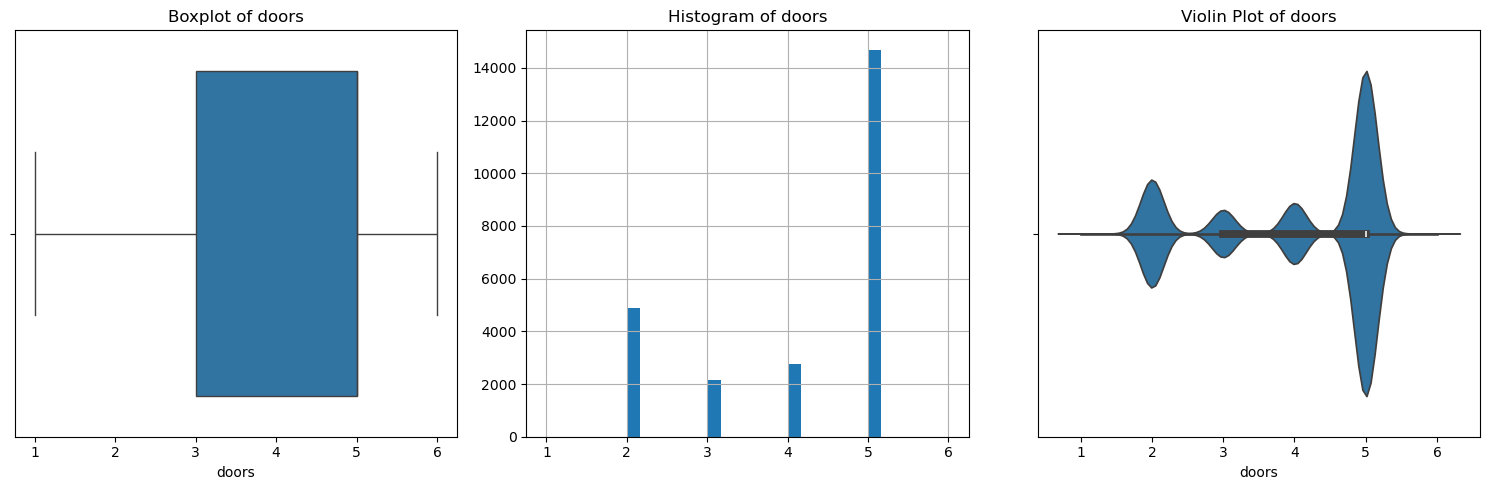

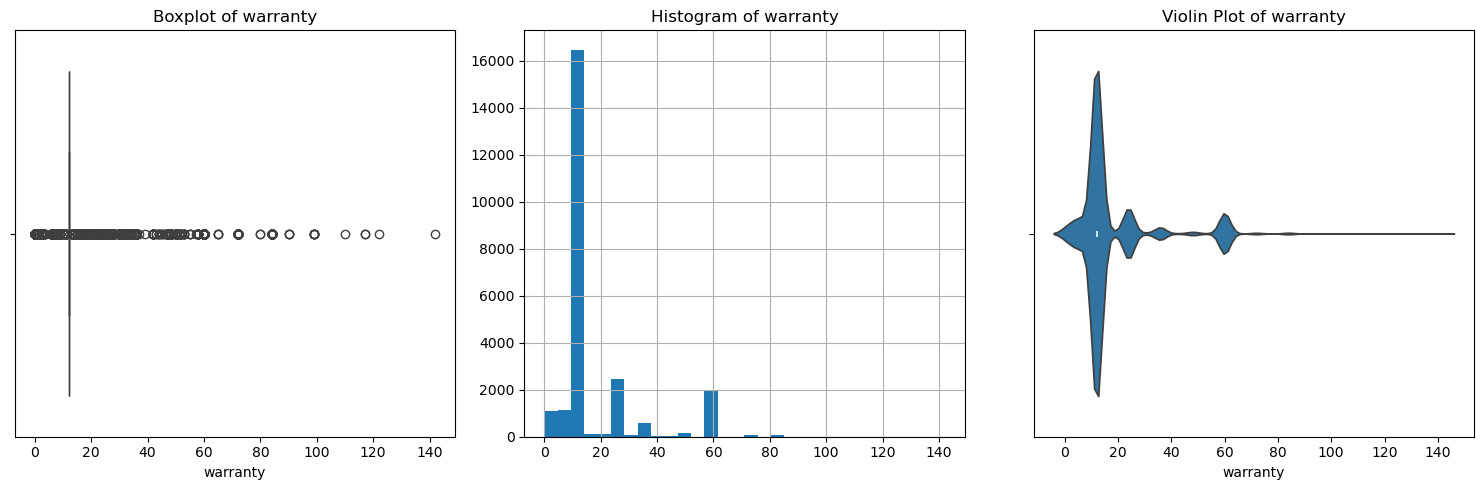

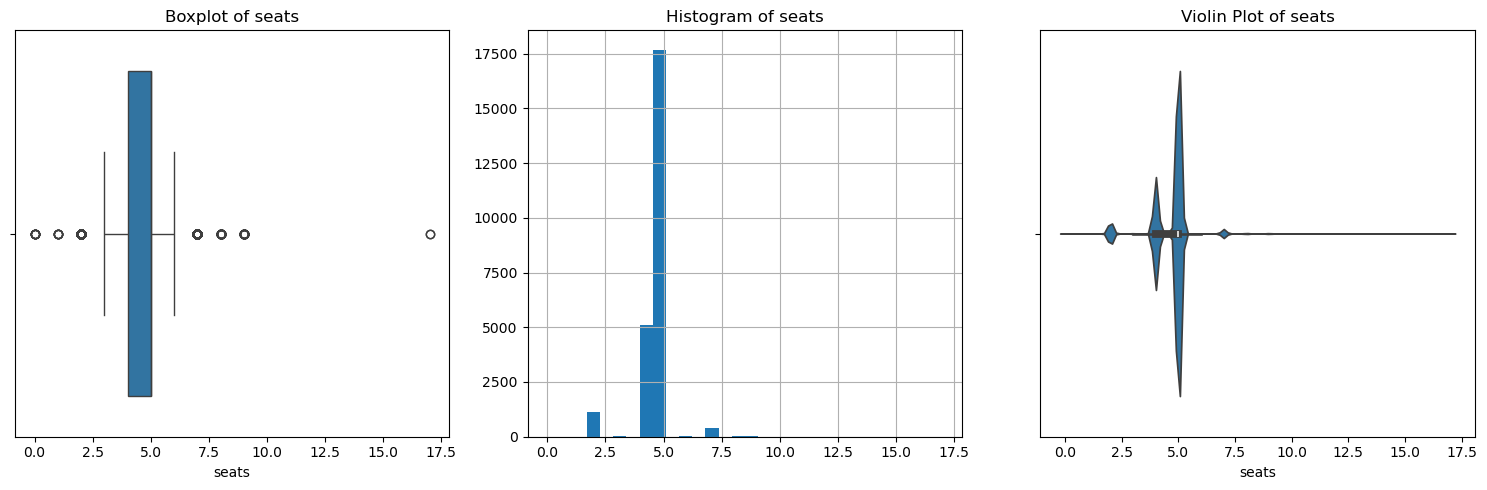

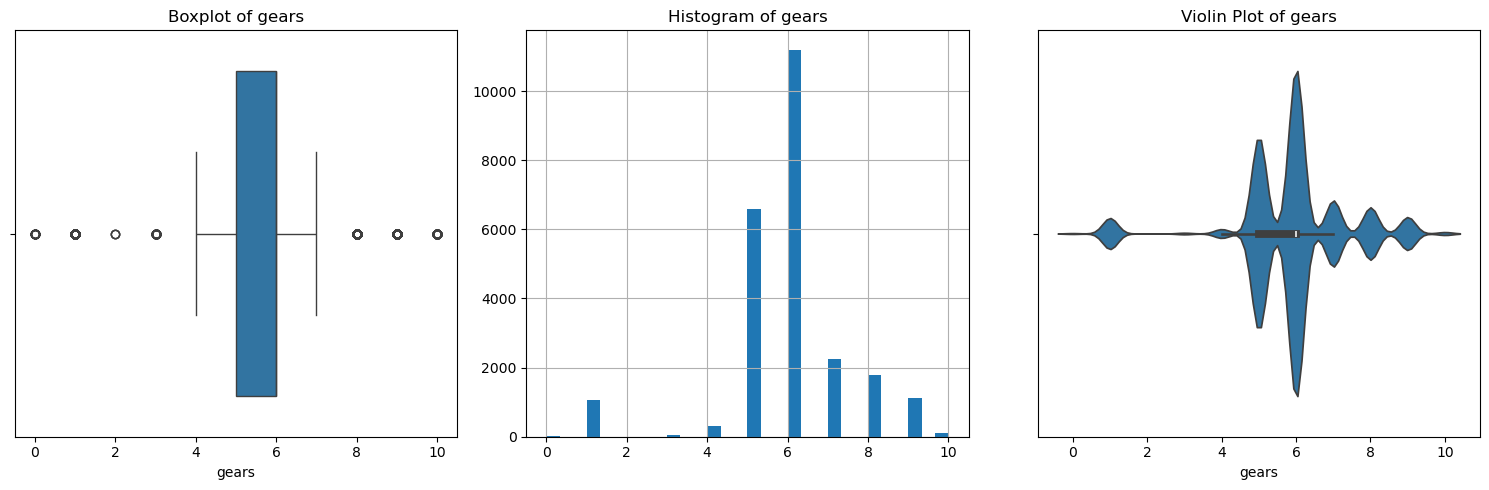

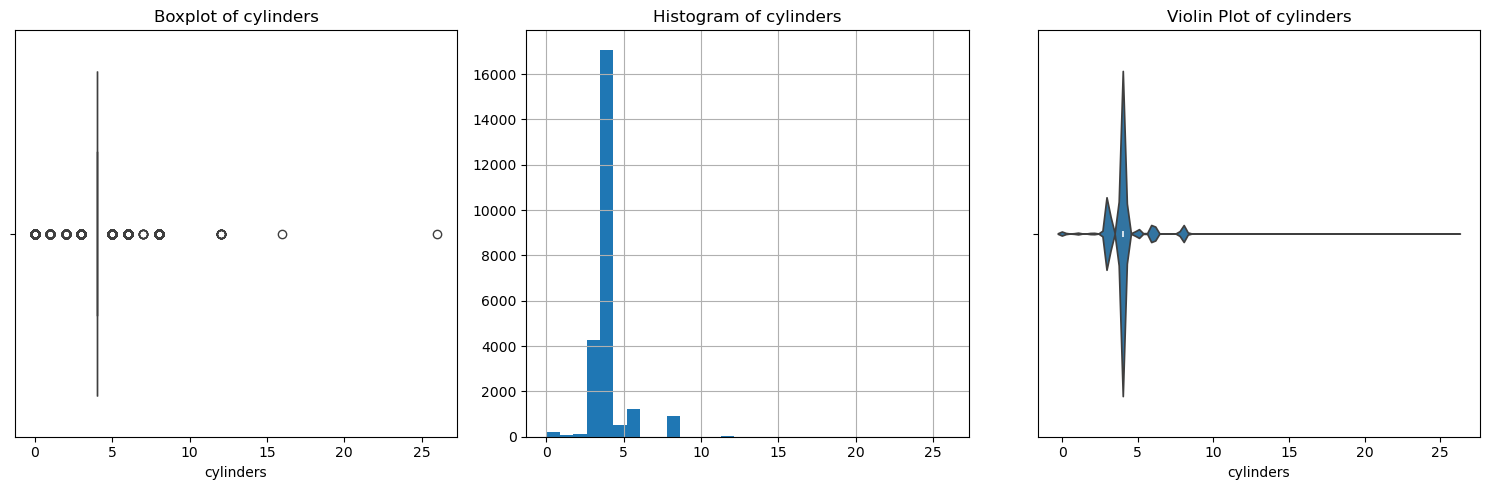

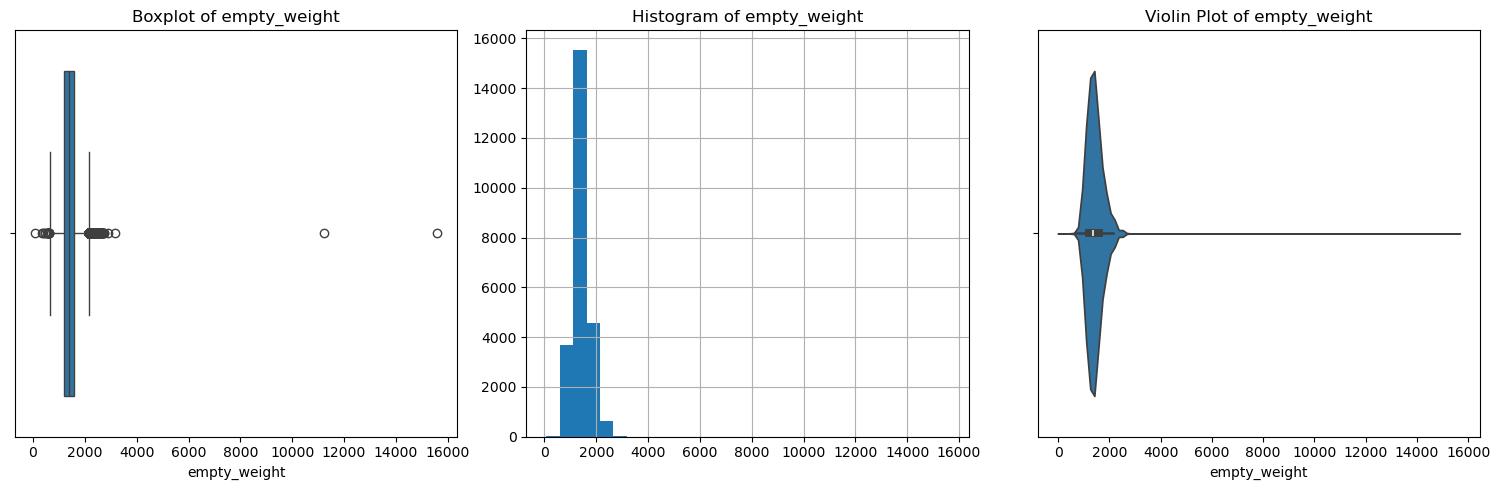

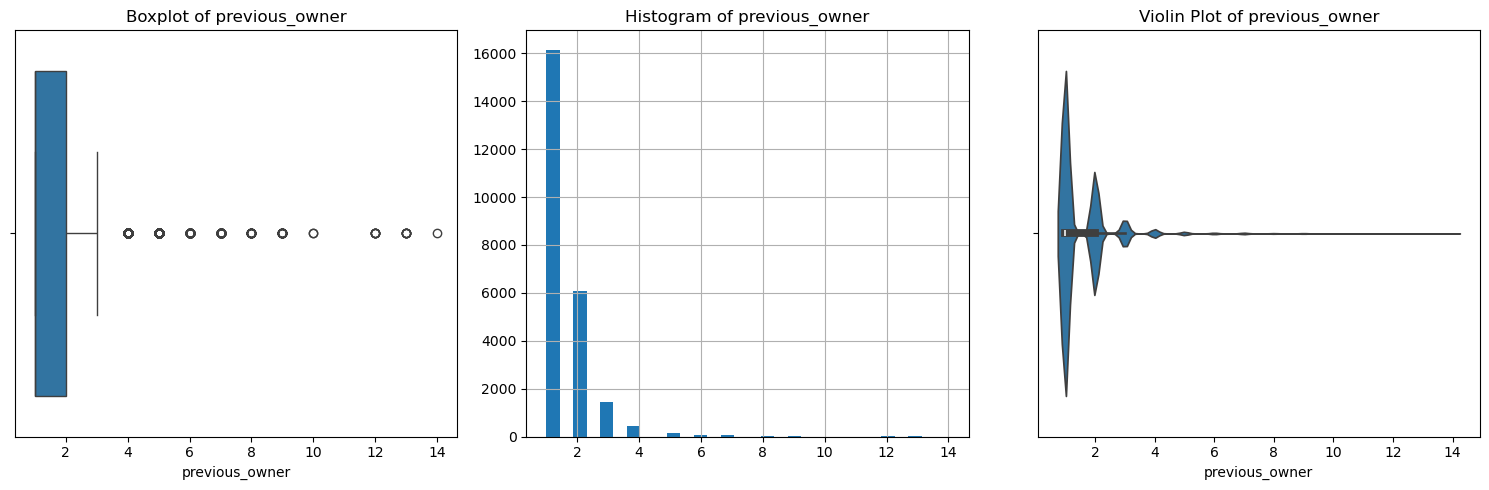

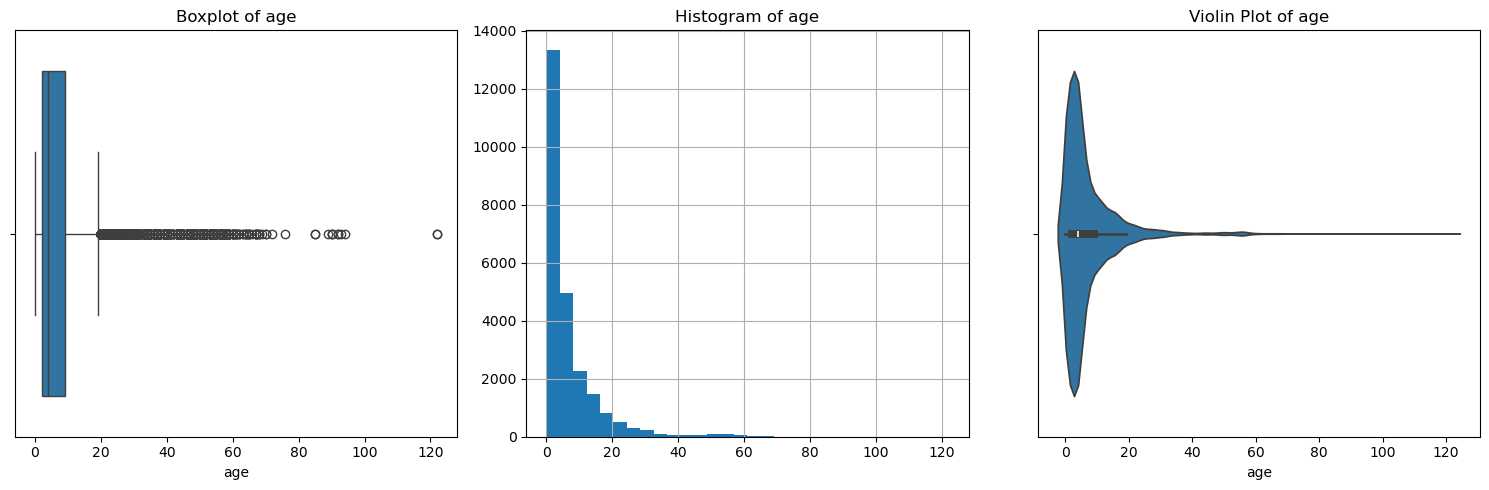

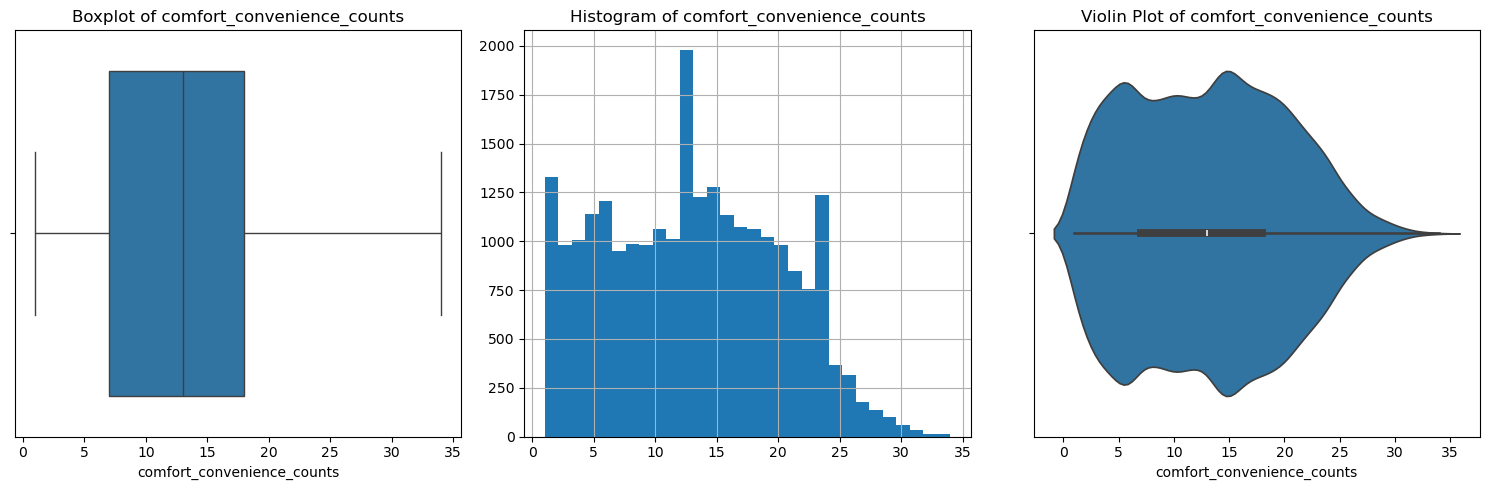

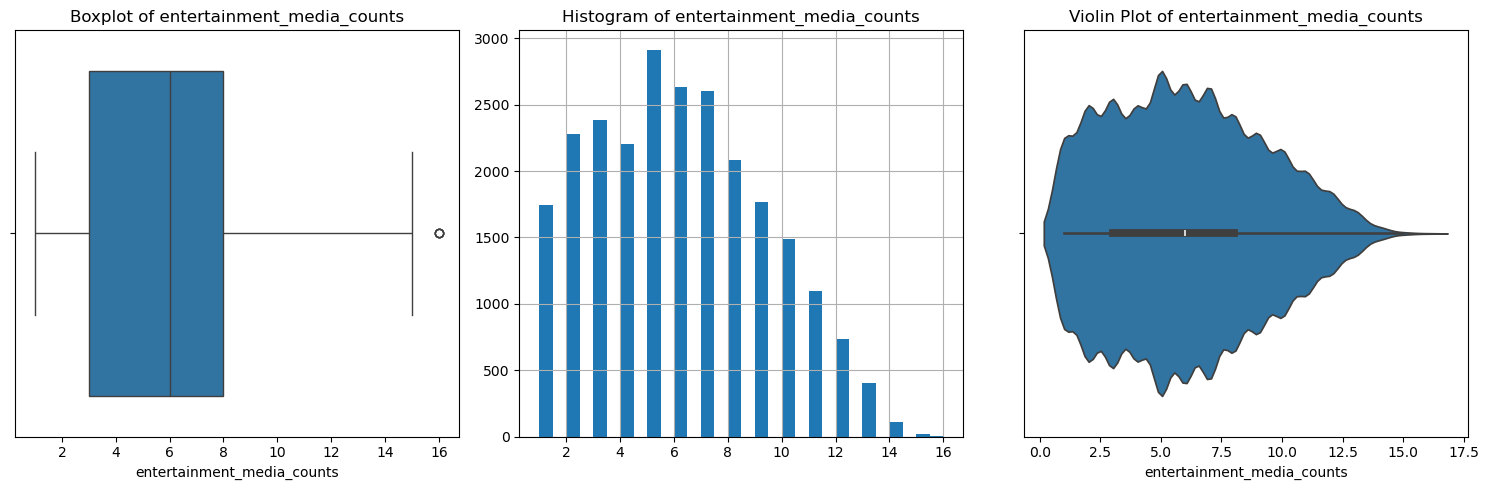

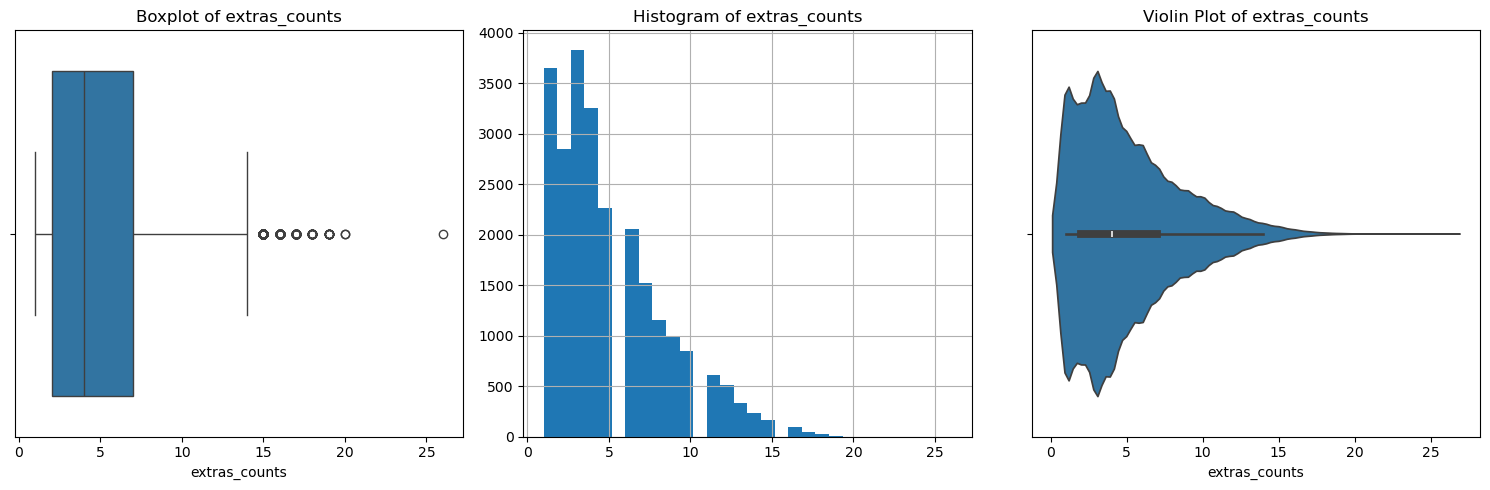

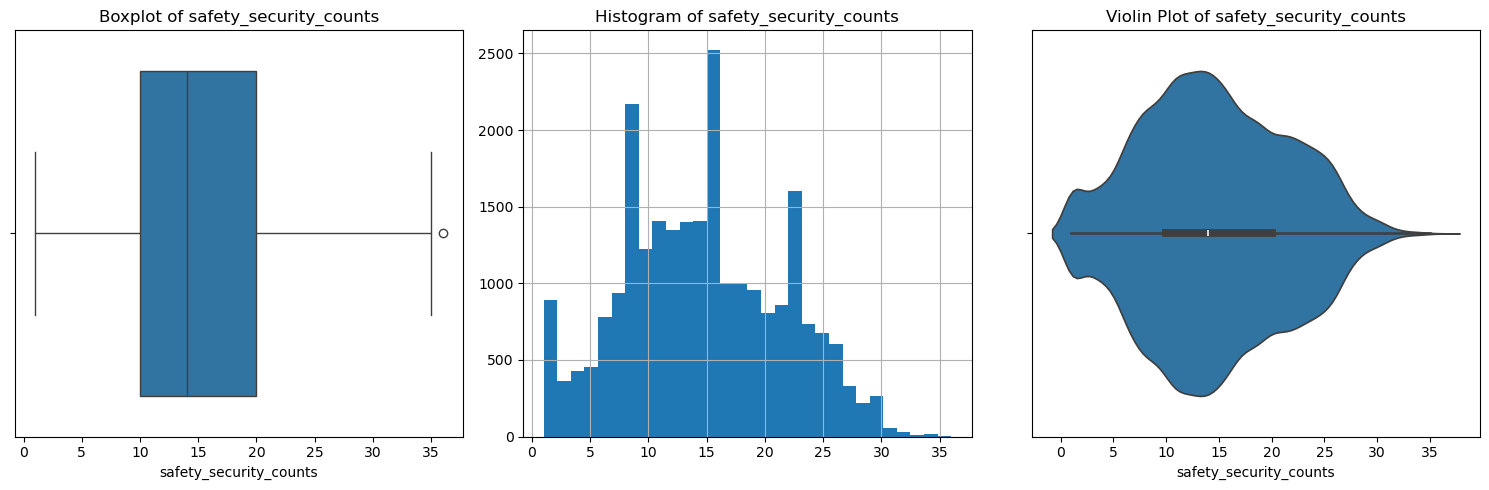

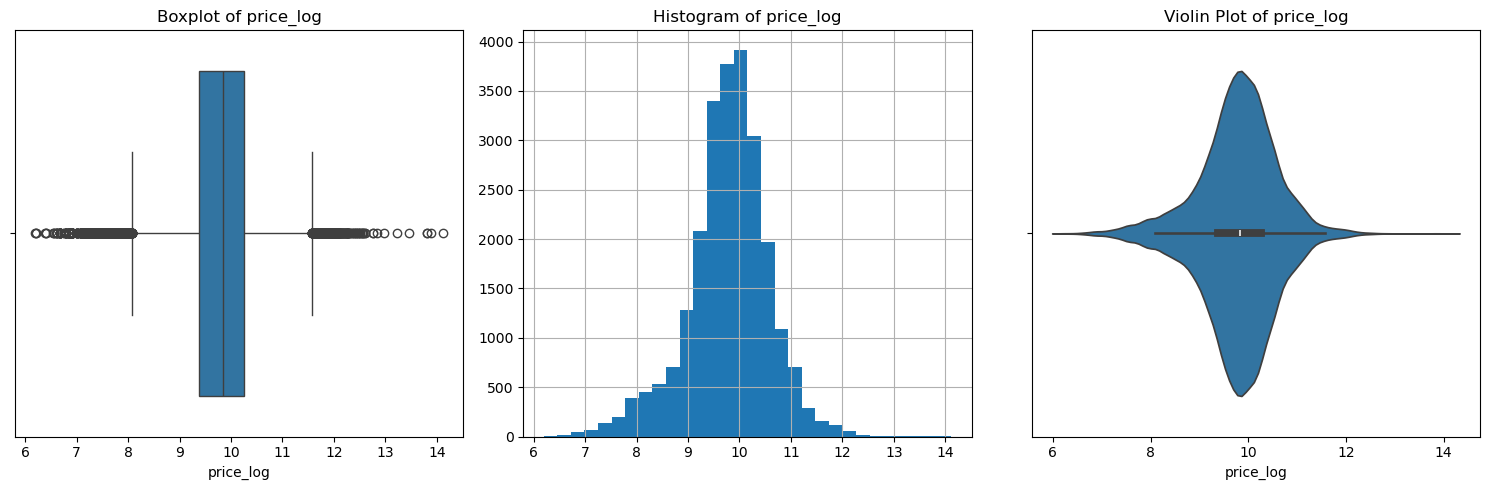

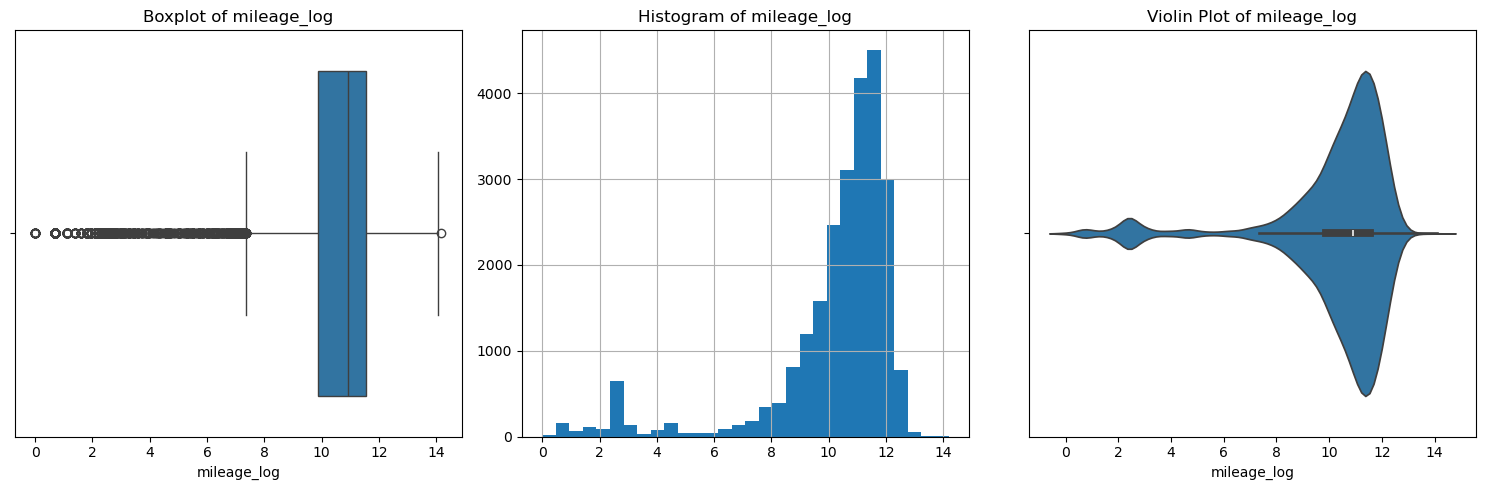

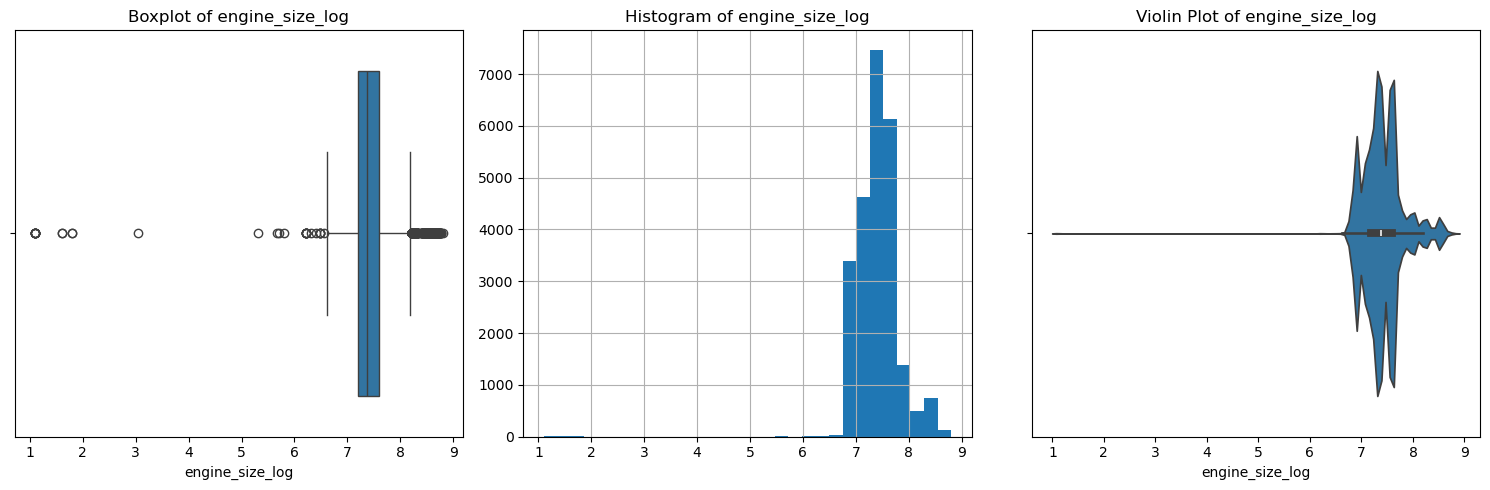

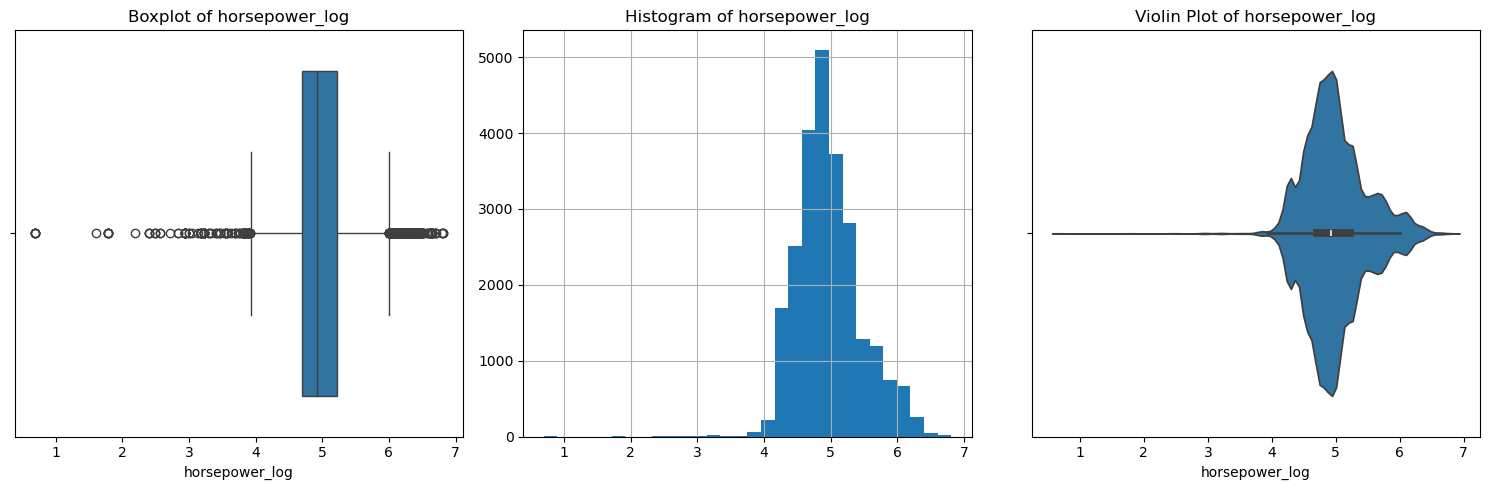

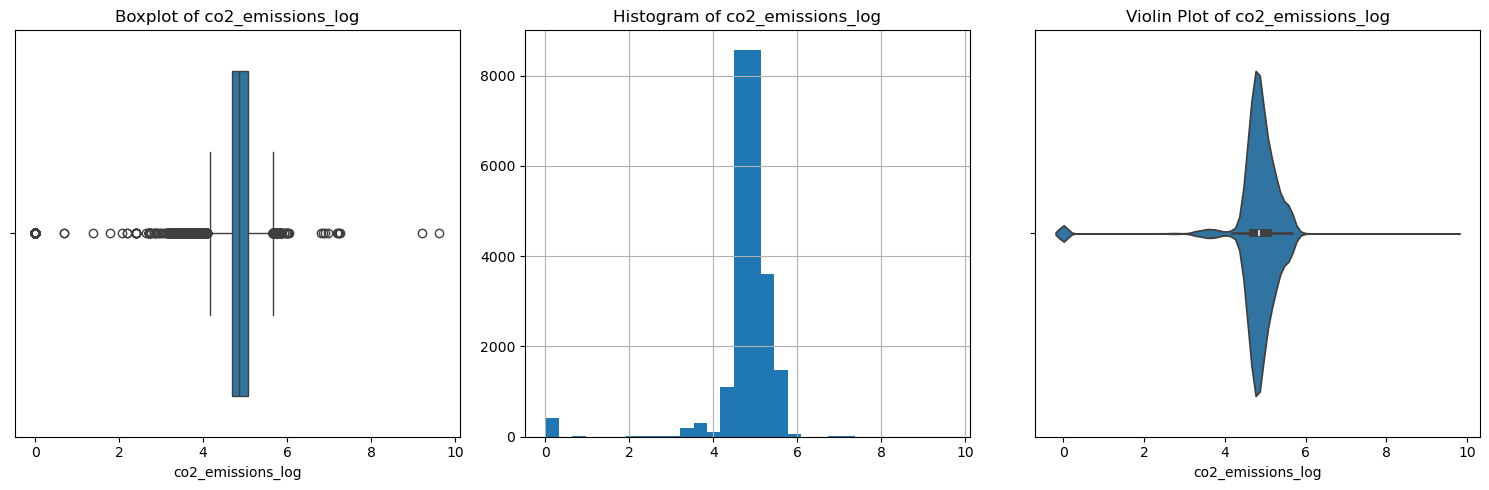

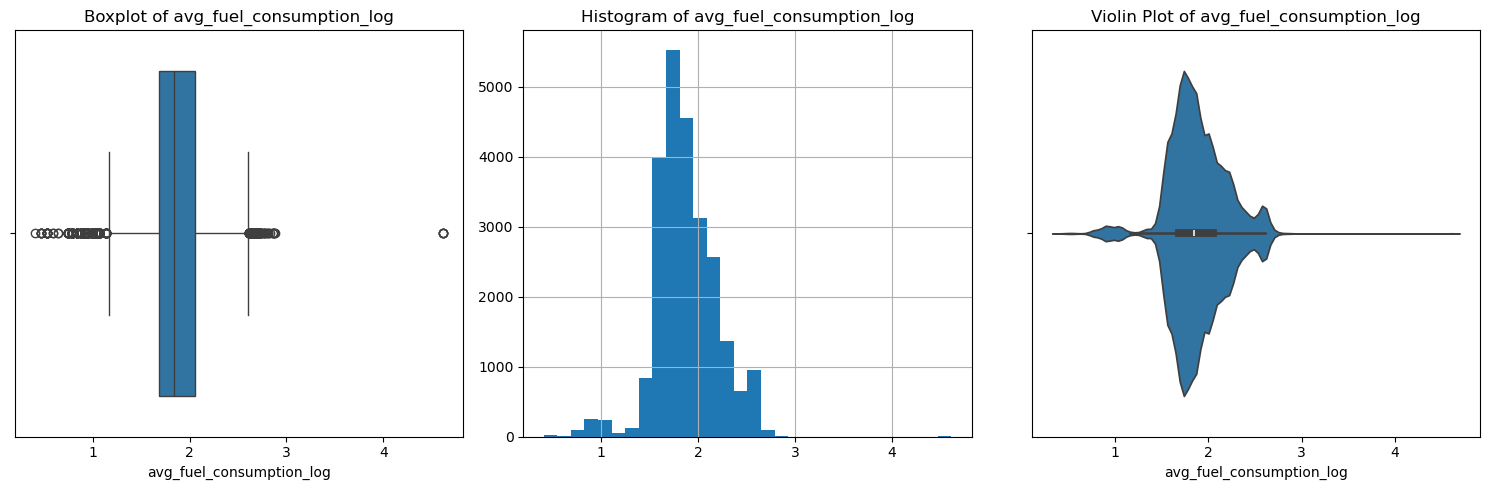

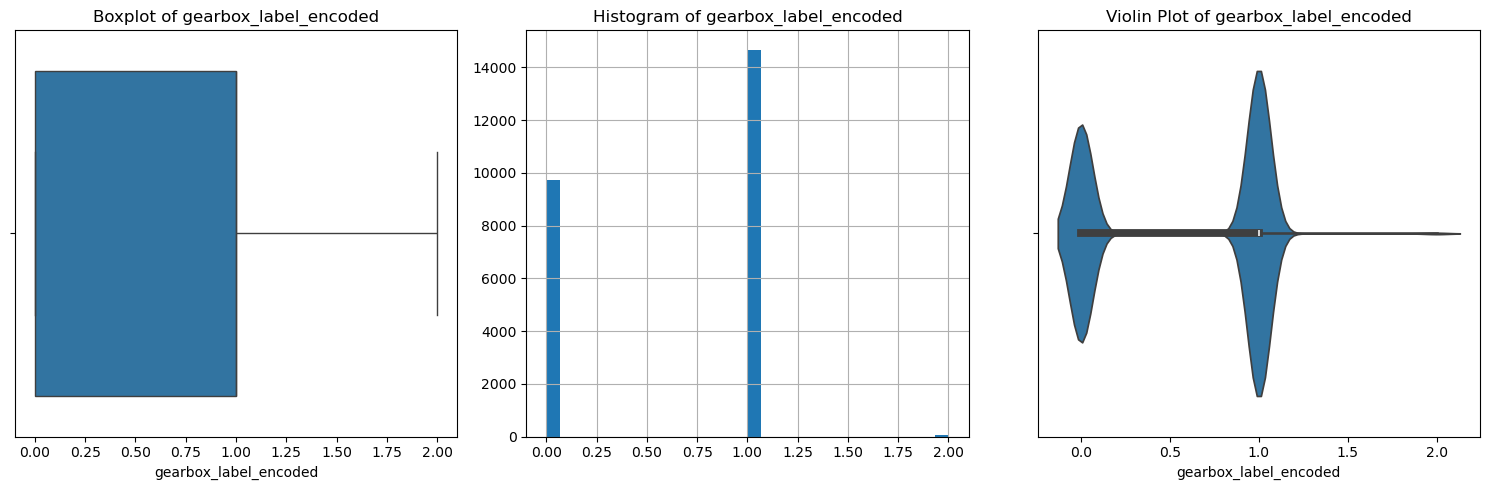

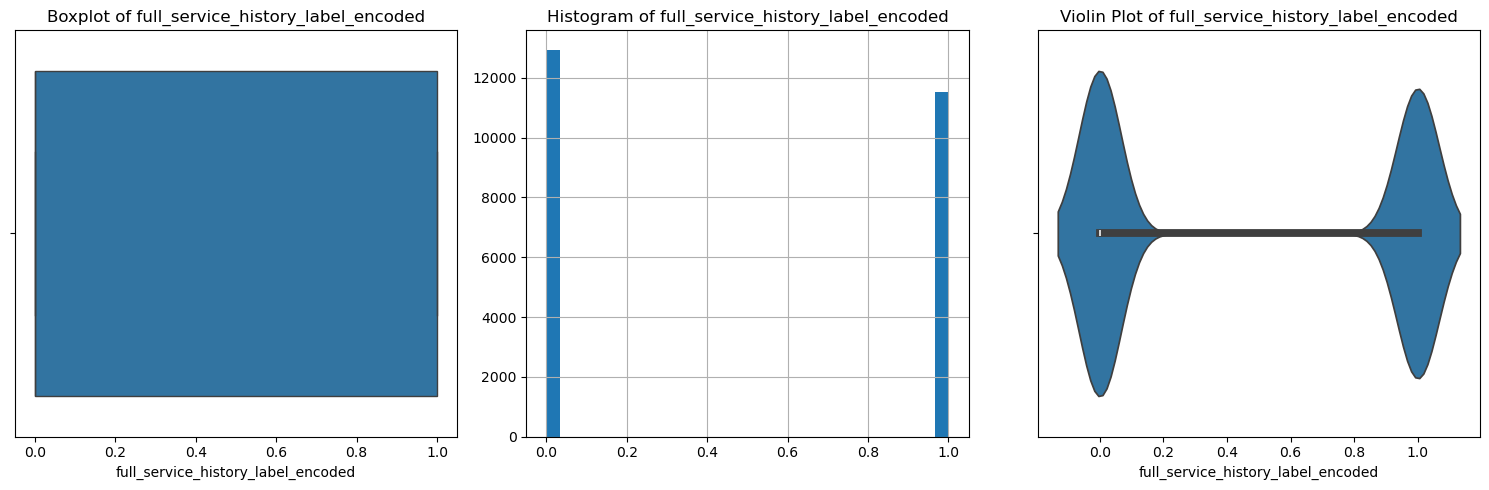

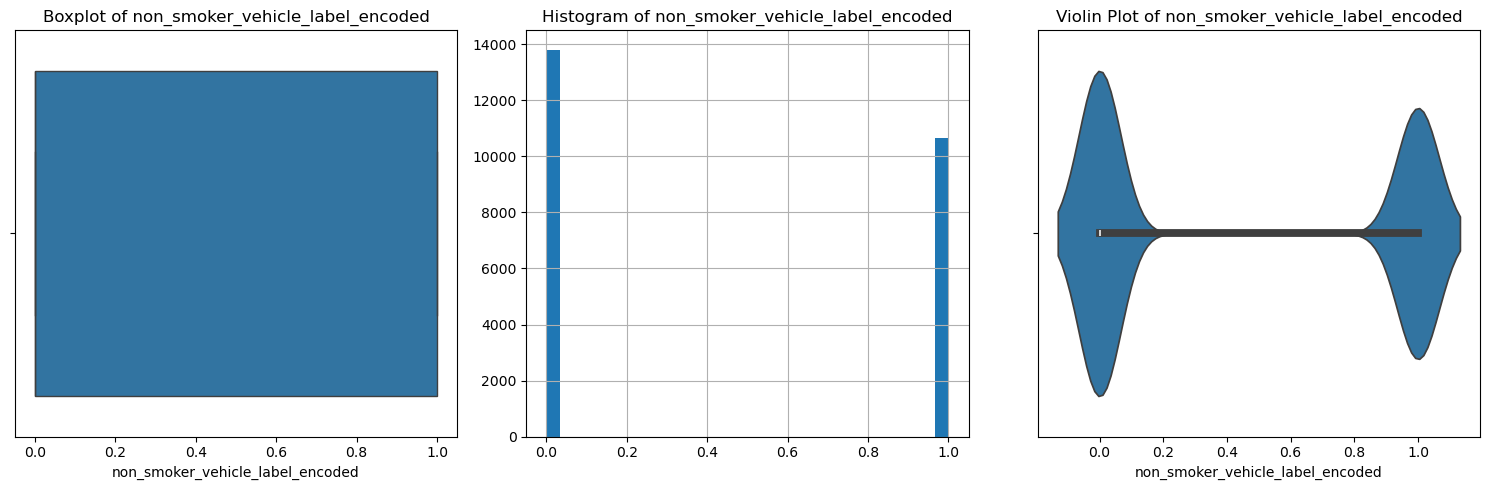

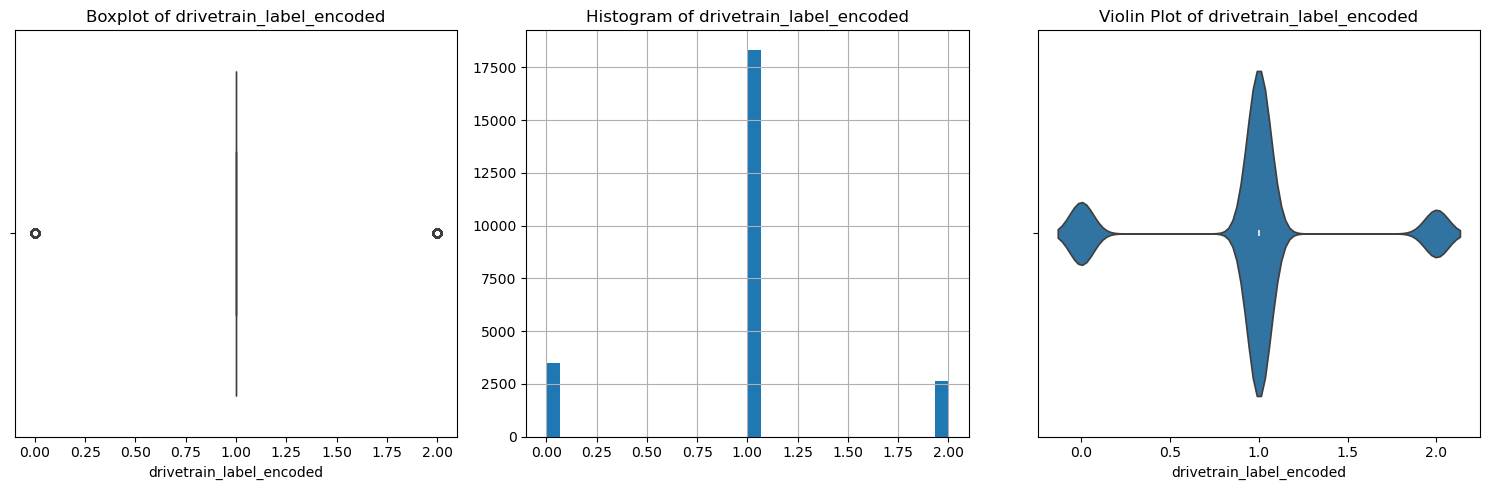

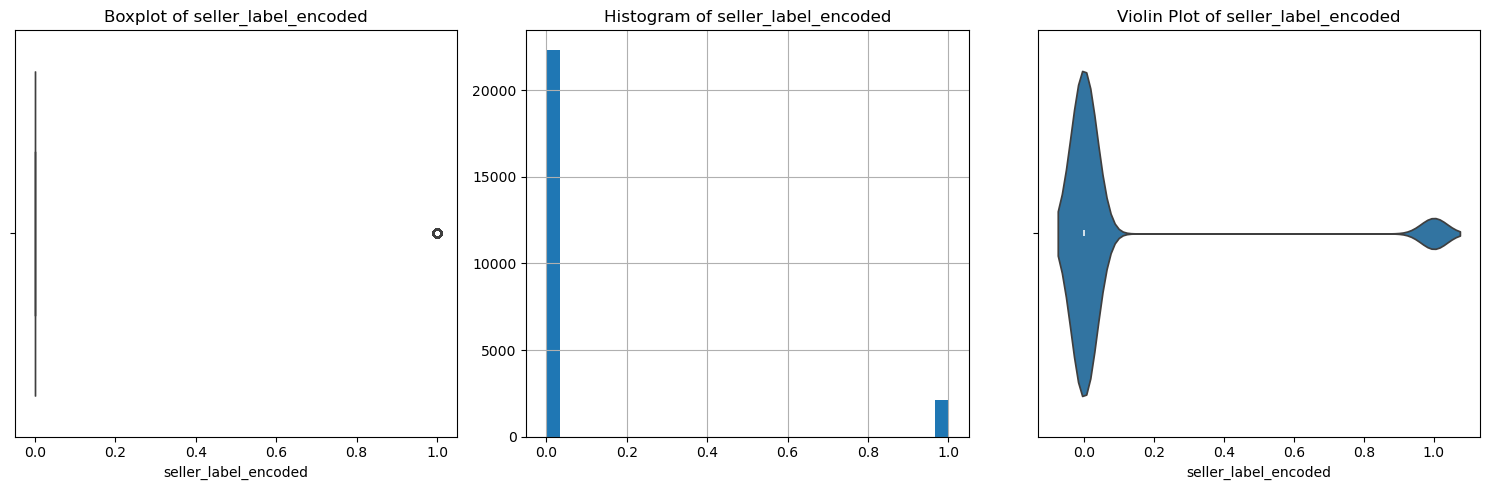

In [37]:
for column in df.describe().columns:
    visualize_outliers(df,column)

In [37]:
df.to_csv('final_scout_not_dummy.csv', index=False)

In [38]:
df_dummied = pd.get_dummies(df, columns=None)

In [40]:
df_dummied.shape

(24462, 54)

In [41]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)